# Classificando ocorrência de diabetes com modelos de *Machine Learning*

Diabetes é uma doença causada pela produção insuficiente ou má absorção de insulina, hormônio que regula a glicose no sangue e garante energia para o organismo. A insulina é um hormônio que tem a função de quebrar as moléculas de glicose (açúcar) transformando-a em energia para manutenção das células do nosso organismo.

Segundo o *site* diabetes.org, "no Brasil, há mais de 13 milhões de pessoas vivendo com diabetes, o que representa 6,9% da população. E esse número está crescendo. Em alguns casos, o diagnóstico demora, favorecendo o aparecimento de complicações. Pode ser que você ou alguém próximo tenha diabetes. Saiba mais e aprenda a conviver bem com a doença, transformando-a em mais um motivo para cuidar da saúde". Para mais informações, acessar [aqui](https://www.diabetes.org.br/publico/diabetes/oque-e-diabetes).

Existem 4 tipos comuns dessa doença:

**1)** A diabetes do tipo 1: Essa doença afeta a forma como o corpo processa o açúcar;

**2)** A diabetes do tipo 2: Essa doença afeta o pâncreas e faz com que esse orgão produza pouca ou nenhuma insulina;

**3)** Pré-diabetes: nível elevado de açúcar no sangue, mas não o suficiente para classificar como diabetes;

**4)** A diabetes gestacional: nível elevado de açúcar no sangue de gestantes

Para cada um desses tipos há sintomas que são diferentes e sintomos que comuns.

Como dito anteriormente, o diagnóstico pode demorar, favorecendo complicações. Tendo em vista essa problemática, será que podemos criar um modelo de *machine learning* de classificação que possa dar um diagnóstico com um certo nível de acurácia para essa doença ?


## Sobre os dados

O dataset em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database) e possue as seguintes variáveis:


**1)** PregnanciesNumber : Número de vezes que esteve grávida;

**2)** GlucosePlasma : Concentração de glicose a 2 horas em um teste oral de tolerância à glicose;

**3)** BloodPressureDiastolic : pressão sanguínea (mm Hg)

**4)** SkinThicknessTriceps : Espessura da dobra cutânea (mm)

**5)** Insulin : Insulina sérica de 2 horas (mu U/ml)

**6)** BMI : Índice de massa corporal (IMC)

**7)** DiabetesPedigreeFunction : Função pedigree do diabetes

**8)** Age : Idade (em anos)

**9)** OutcomeClass : Variável de resultado (0 ou 1) 268 de 768 são 1, os outros resultados são 0.

Se for diabético o resultado será 1 e caso não seja, o resultado é zero.

## Etapas

1) importação das bibliotecas

2) importação dos dados

3) Tratamento dos dados

4) Análise exploratória dos dados

5) Separação dos dados de treino e teste

6) Modelagem

7) Análise dos resultados


## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

C:\Users\junio\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importação dos dados

In [3]:
diabetes=pd.read_csv('diabetes.csv')

Visualizando as 5 primeiras linhas do conjunto de dados.

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Visualizando o tipo dos dados.

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Tabela estatística do conjunto de dados.

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Aparentemente não temos dados faltantes.

In [7]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Tratamento dos dados

Há colunas que possuem inconsistências, como valores que estão zerados como podemos ver novamente na tabela estatística. Por exemplo, há pessoas que estão com os valores de pressão sanguínea, IMC e espessura da pele zerados, e isso não faz o menor sentido. Já outros valores fazem sentidos, como:

1) número de vezes que uma mulher ficou grávida (nunca esteve grávida, o que pode estar associado a uma diabetes não gestacional);

2) ou insulina (não está produzindo insulina, típico da doença);

3) Em certos casos de diabetes a glicose no corpo pode cair (hipoglicemia).

Por esse motivo precisaremos fazer uma substituição desses valores. No nosso caso iremos substituí-los pela mediana, que é uma medida tendência central que não é influenciada por *outliers* (valores extremos).

In [8]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Então vamos tratar apenas as colunas pressão sanguínea (*BloodPressure*), IMC (*BMI*) e espessura da pele (*SkinThickness*) substituindo os valores zerados pela mediana.

In [9]:
lista=['BloodPressure','BMI','SkinThickness']

In [10]:
for i in lista:
    diabetes[i].replace(0,diabetes[i].median(),inplace=True)

Abaixo podemos ver que os valores foram substituídos e os valores mínimos são diferentes da tabela anterior.

In [11]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Mais a frente, antes de separarmos os dados de treino e teste, iremos fazer uma outra transformação dos dados.

## Análise exploratória dos dados

Vamos agora analisar cada um dos dados e cruzá-los com os dados da nossa variável *target* *Outcome*.

Podemos ver que temos um problema de desbalanceamento de classes. Há mais mulheres sem diabetes do que as que possuem a doença.

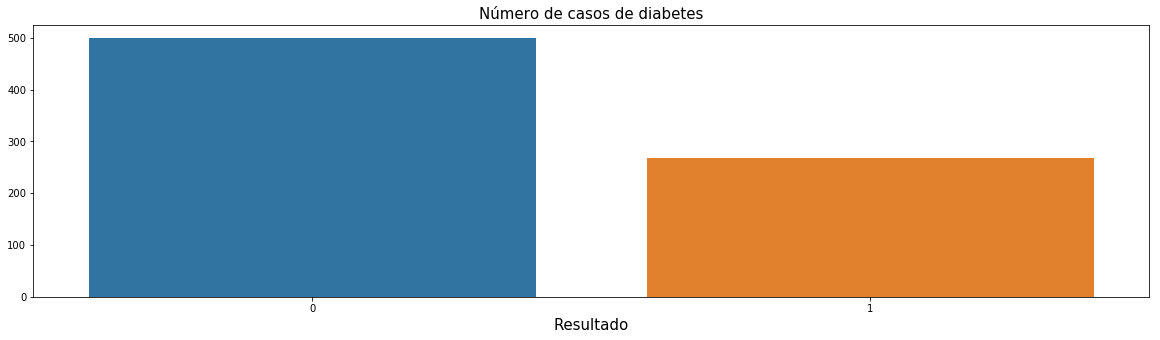

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(diabetes['Outcome'])
plt.xlabel('Resultado',size=15)
plt.ylabel('')
plt.title('Número de casos de diabetes',size=15)
plt.show()

O gráfico abaixo que a medida que o número de vezes que uma mulher engravida aumenta, o número de casos de diabetes parece aumentar. Veja que até 6 gravidezes o número de não diabáticas é maior que o número de diabéticas, após isso o número de mulheres com diabetes é maior.

<Figure size 1440x360 with 0 Axes>

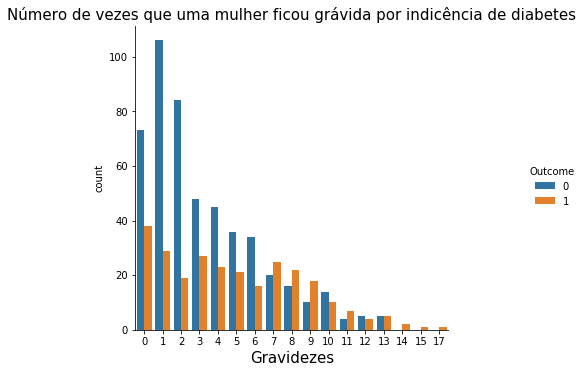

In [13]:
plt.figure(figsize=(20,5))
sns.catplot(x="Pregnancies", kind="count", data=diabetes, hue='Outcome')
plt.xlabel('Gravidezes',size=15)
plt.title('Número de vezes que uma mulher ficou grávida por indicência de diabetes',size=15)
plt.show();

Os gráficos em barra abaixo nos mostram que: O número de casos de diabetes aumenta com o número de vezes que um mulher fica grávida. Em média, mulheres com diabetes tiveram um número maior de gravidezes.

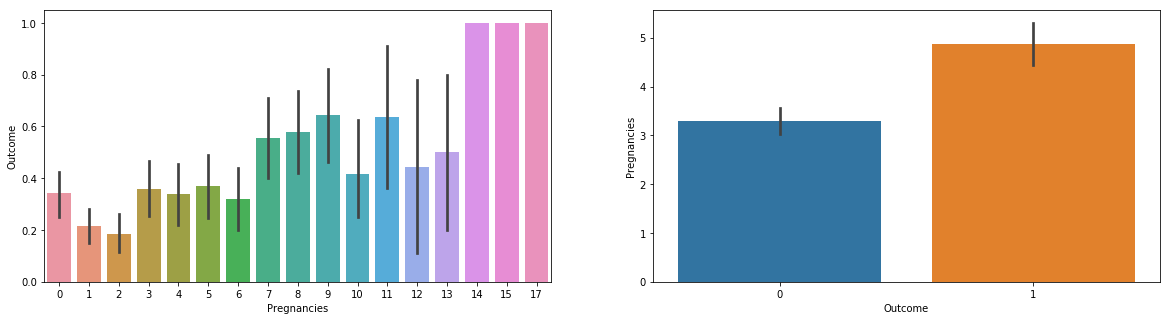

In [14]:
fig, ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(y='Outcome', x= 'Pregnancies',data=diabetes, ax=ax[0])
sns.barplot(x='Outcome', y= 'Pregnancies',data=diabetes, ax=ax[1]);

Podemos ver que as distribuições da coluna *Pregnancies* por *Outcome* são diferentes.

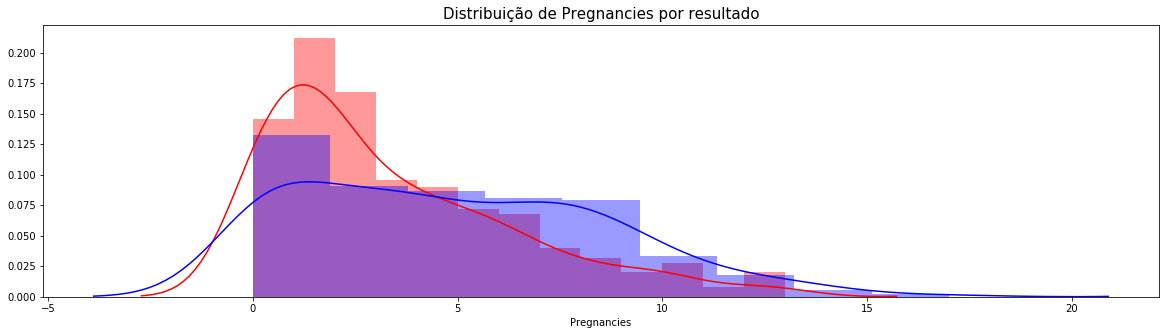

In [15]:
plt.figure(figsize=(20,5))
sns.distplot(diabetes['Pregnancies'].loc[diabetes['Outcome']==0],color='red')
sns.distplot(diabetes['Pregnancies'].loc[diabetes['Outcome']==1],color='blue')
plt.title('Distribuição de Pregnancies por resultado',size=15);

Agora vamos analisar a coluna *Glucose* que mostra o quanto de açúcar uma pessoa tem no sangue. Em média, a glicose de pessoas com diabetes é maior do que as pessoas que não tem diabetes, resultado esse que já era esperado.

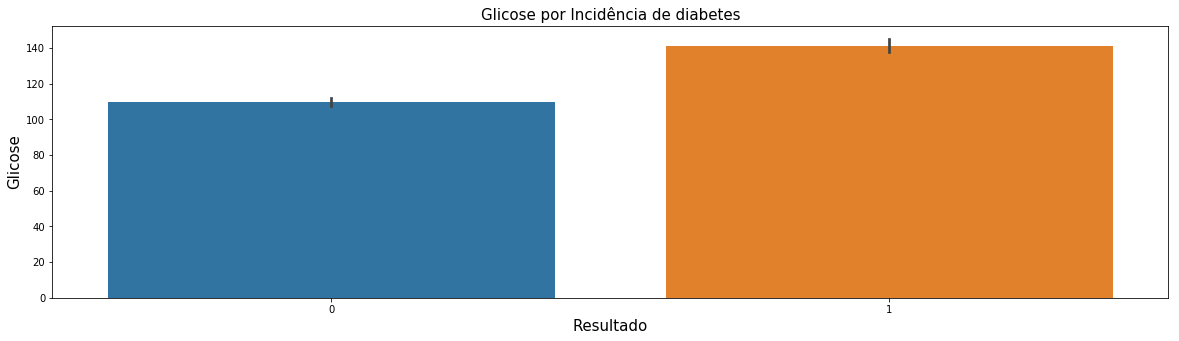

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'Glucose',data=diabetes)
plt.xlabel('Resultado',size=15)
plt.ylabel('Glicose',size=15)
plt.title('Glicose por Incidência de diabetes',size=15)
plt.show()

Um pessoa com a taxa de glicose normal tem valores entre 100 a Inferior à 140 mg/dL, comportamento esse que pode ser visto no histograma vermelho, onde a concentração está em 100 e no máximo chega a 150. Já aqueles que possuem a doença os dados de concentram em níveis acima de 140 e chegam a 200 mg/dL, que pode ser visto no histograma azul.

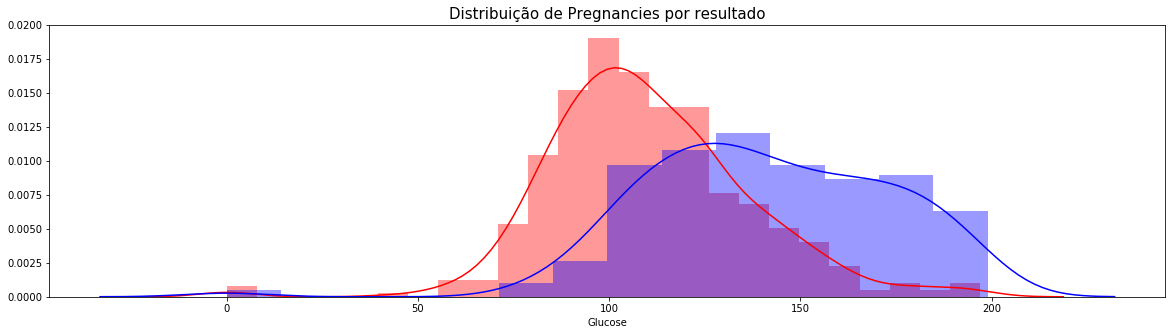

In [17]:
plt.figure(figsize=(20,5))
sns.distplot(diabetes['Glucose'].loc[diabetes['Outcome']==0],color='red')
sns.distplot(diabetes['Glucose'].loc[diabetes['Outcome']==1],color='blue')
plt.title('Distribuição de Pregnancies por resultado',size=15);

Não há diferença de pressão sanguínea entre quem tem a doença e quem não tem a doença.

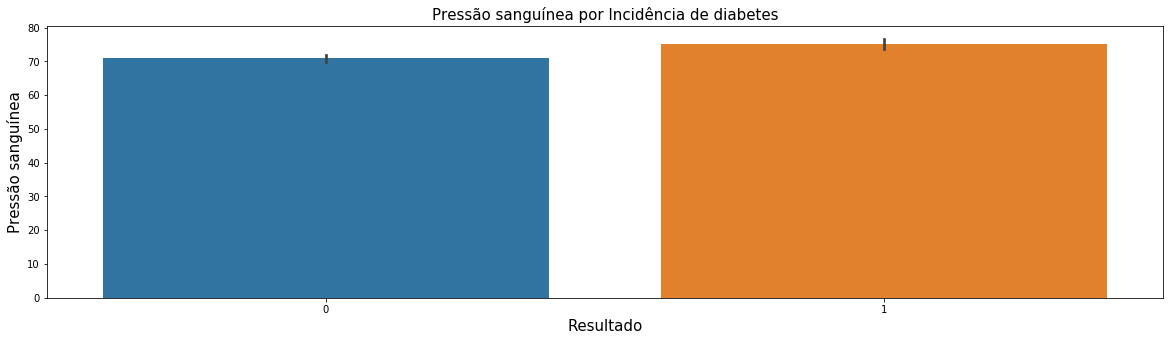

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'BloodPressure',data=diabetes)
plt.xlabel('Resultado',size=15)
plt.ylabel('Pressão sanguínea',size=15)
plt.title('Pressão sanguínea por Incidência de diabetes',size=15)
plt.show()

A distribuição por *Outcome* são bastante semelhantes, podemos ver isso pela proximidade entre os KDE's dos histogramas.

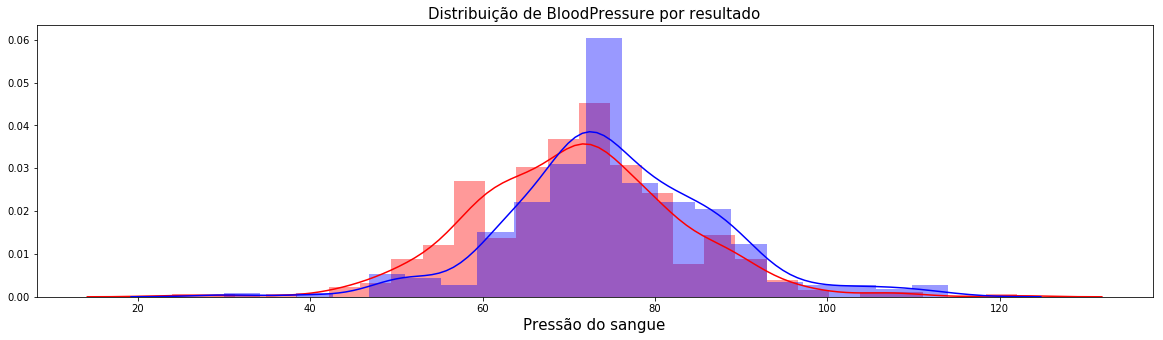

In [19]:
plt.figure(figsize=(20,5))
sns.distplot(diabetes['BloodPressure'].loc[diabetes['Outcome']==0],color='red')
sns.distplot(diabetes['BloodPressure'].loc[diabetes['Outcome']==1],color='blue')
plt.title('Distribuição de BloodPressure por resultado',size=15)
plt.xlabel("Pressão do sangue",size=15);

Sintomas de diabetes também podem surgir na pele do doente, o que faz que ele possa sofrer mais com ferimentos que o normal. Abaixo podemos ver que pessoas portadoras dessa doença podem ter uma espessura de dobra da pele um pouco maior que as pessoas que não são portadoras.

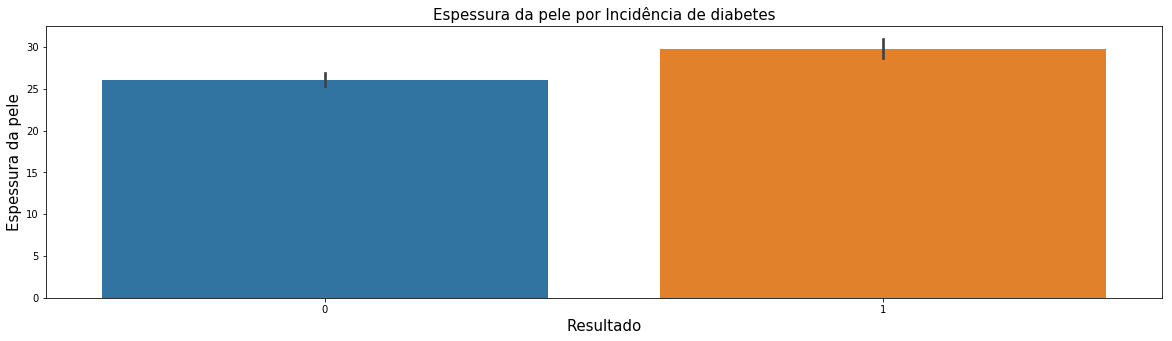

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'SkinThickness',data=diabetes)
plt.xlabel('Resultado',size=15)
plt.ylabel('Espessura da pele',size=15)
plt.title('Espessura da pele por Incidência de diabetes',size=15)
plt.show()

No histograma em vermelho, os dados estão mais a esquerda, ou seja a espessura da dobra em média é menor; enquanto no histograma em azul, os dados estão mais concentrados a direita, ou seja, espessura de dobra da pele maior.

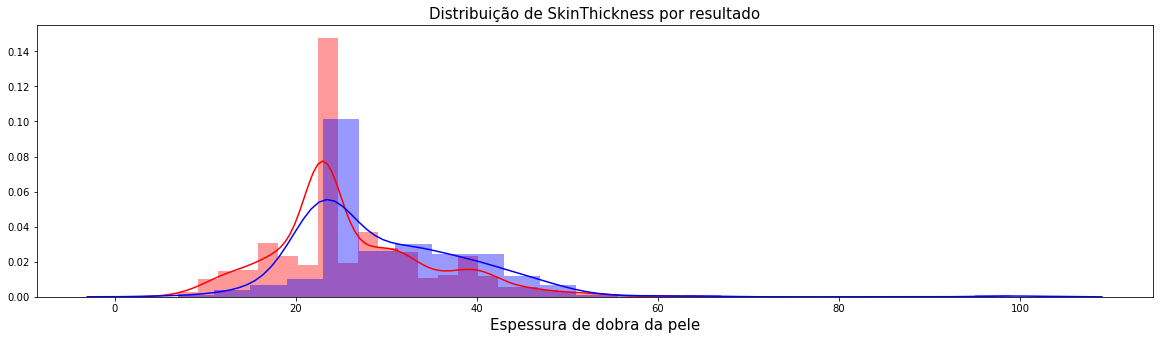

In [21]:
plt.figure(figsize=(20,5))
sns.distplot(diabetes['SkinThickness'].loc[diabetes['Outcome']==0],color='red')
sns.distplot(diabetes['SkinThickness'].loc[diabetes['Outcome']==1],color='blue')
plt.title('Distribuição de SkinThickness por resultado',size=15)
plt.xlabel("Espessura de dobra da pele",size=15);

Uma das mais importantes variáveis acredito que seja *Insulin*, pois está diretamente associada a doença em questão. Como falado anteriormente, a diabetes causa uma redução ou cessação da produção de insulina no corpo humano. Aqui ocorreu um fato interessante: pessoas portadoras da doença possuem, em média, uma taxa de insulina maior, isso pode ter ocorrido por termos as classes desbalanceadas.

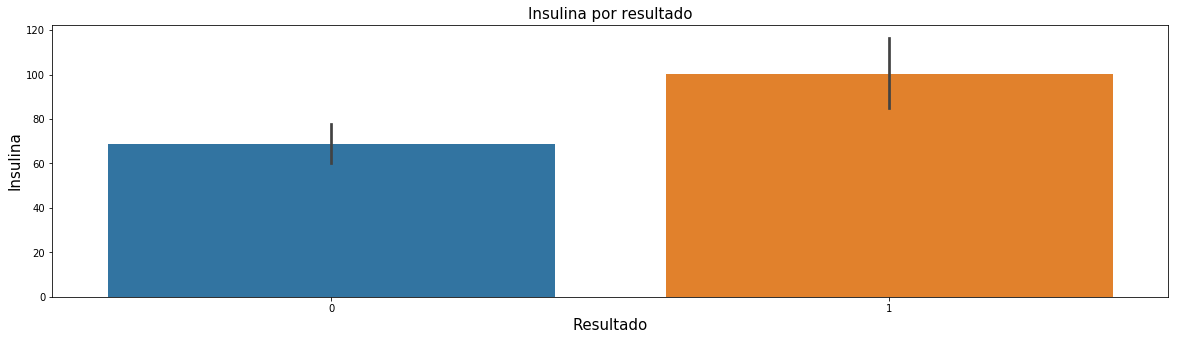

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'Insulin',data=diabetes)
plt.xlabel('Resultado',size=15)
plt.ylabel('Insulina',size=15)
plt.title('Insulina por resultado',size=15)
plt.show()

Distribuição de Insulin por resultado.

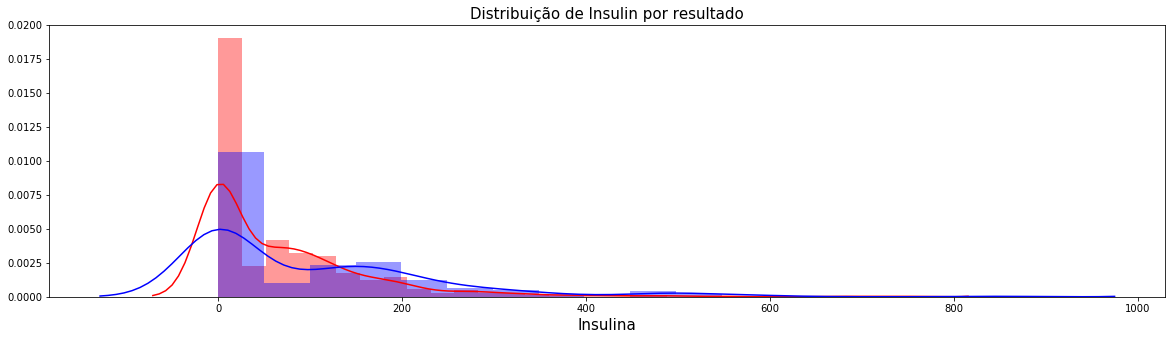

In [23]:
plt.figure(figsize=(20,5))
sns.distplot(diabetes['Insulin'].loc[diabetes['Outcome']==0],color='red')
sns.distplot(diabetes['Insulin'].loc[diabetes['Outcome']==1],color='blue')
plt.title('Distribuição de Insulin por resultado',size=15)
plt.xlabel("Insulina",size=15);

Aqui vemos que pessoas portadoras de diabetes possuem um IMC maior do que o grupo que não possue a doença, entretanto essa diferença é pequena.

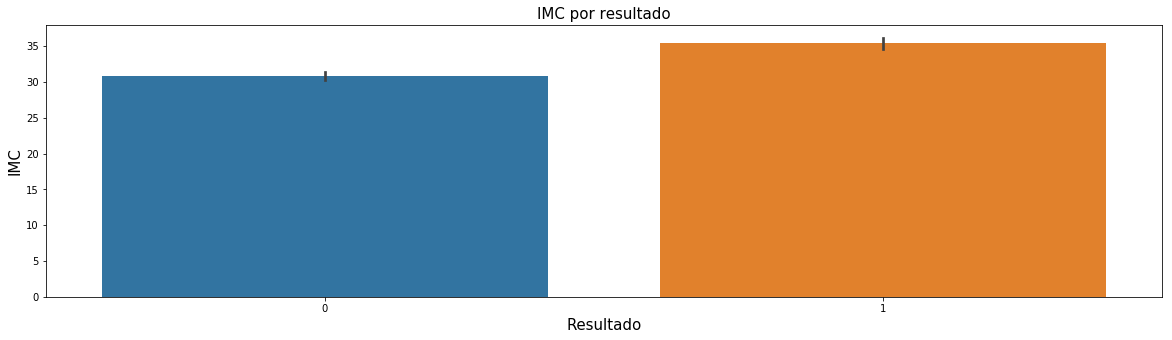

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'BMI',data=diabetes)
plt.xlabel('Resultado',size=15)
plt.ylabel('IMC',size=15)
plt.title('IMC por resultado',size=15)
plt.show()

A *Diabetes Pedigree Function* é uma função que avalia a probabilidade de diabetes com base no histórico familiar. Maiores *scores* significam uma probabilidade maior de obter a doença e é justamente isso que observamos no gráfico abaixo. O *score* de quem possue a doença é maior do que quem não possue.

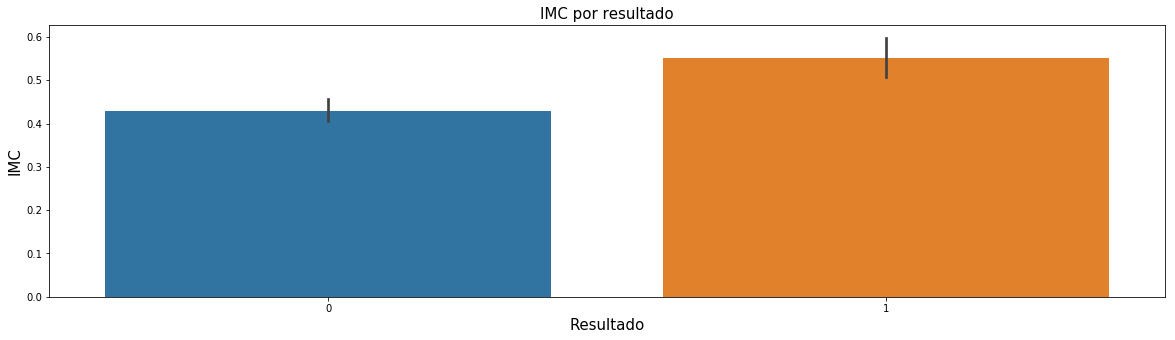

In [25]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'DiabetesPedigreeFunction',data=diabetes)
plt.xlabel('Resultado',size=15)
plt.ylabel('IMC',size=15)
plt.title('IMC por resultado',size=15)
plt.show()

Por fim, vamos analisar a *feature* idade (*Age*). O que se imagina é que pessoas de idade mais avançada tem uma propensão maior de obter essa doença. Abaixo podemos ver que a medida que idade aumenta o número de mulheres com a doença supera as que não possuem.

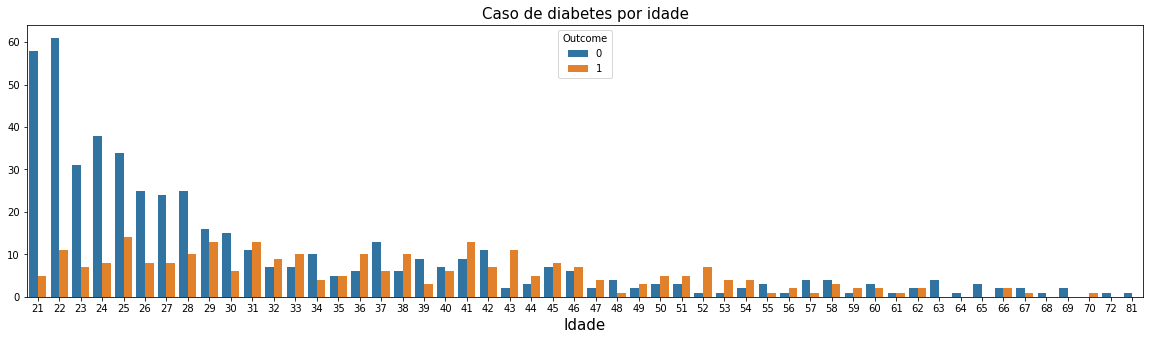

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(diabetes['Age'],hue=diabetes['Outcome'])
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title("Caso de diabetes por idade",size=15)
plt.show()

A média de idade de portadores de diabetes é maior do que a dos não portadores.

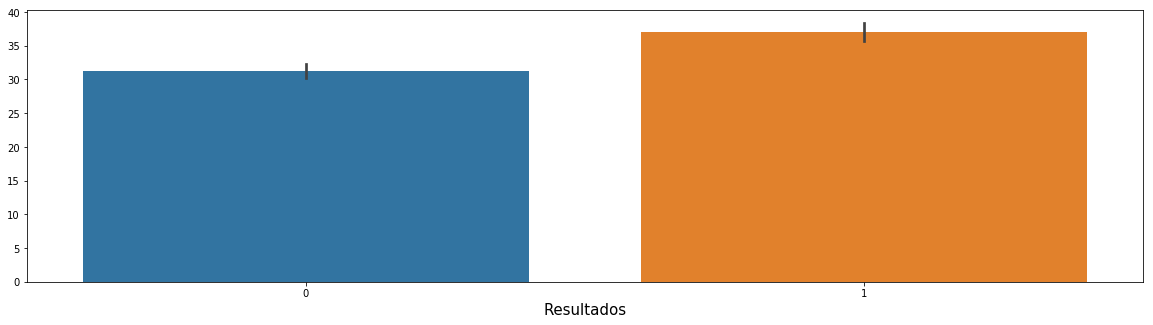

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x='Outcome', y= 'Age',data=diabetes)
plt.xlabel('Resultados',size=15)
plt.ylabel('')
plt.show()

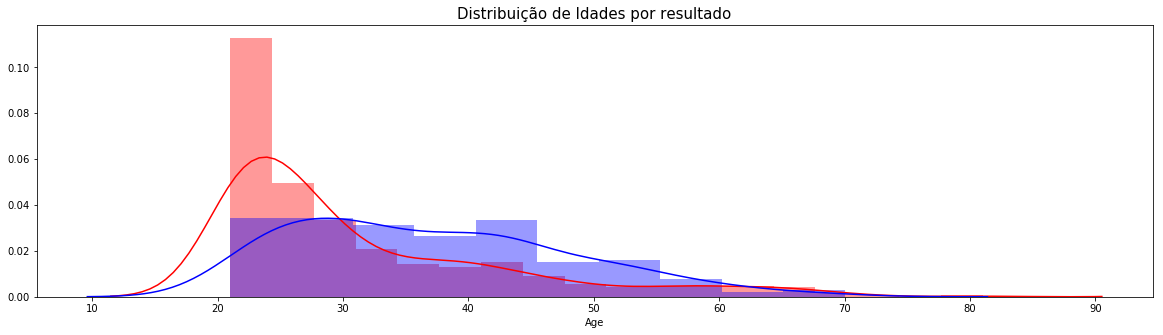

In [28]:
plt.figure(figsize=(20,5))
sns.distplot(diabetes['Age'].loc[diabetes['Outcome']==0],color='red')
sns.distplot(diabetes['Age'].loc[diabetes['Outcome']==1],color='blue')
plt.title('Distribuição de Idades por resultado',size=15);

Agora vamos ver a correlação entre as *features*: A *feature* mais correlacionada com a variável *target Outcome* é a *Glucose*.

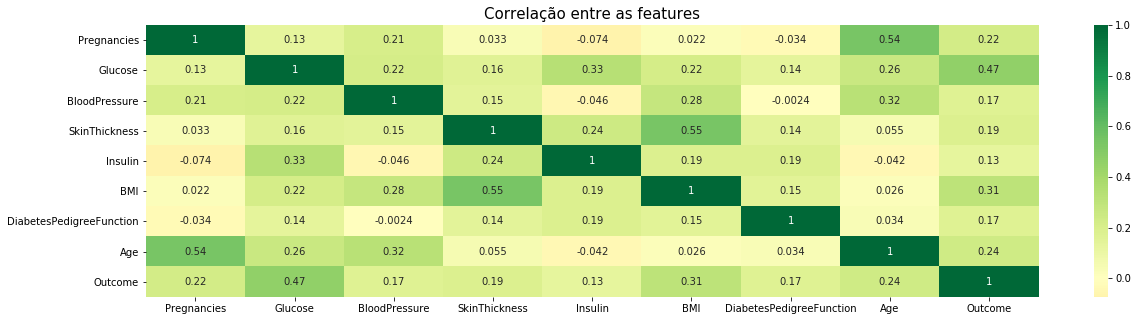

In [29]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features',size=15)
sns.heatmap(diabetes.corr(), cmap='RdYlGn', center=0, annot=True);

## Separando dados de treino e teste

Vamos agora separar os dados de treino e teste. Antes disso vamos fazer uma transformação nos dados que é a padronização (*Standarization*), onde cada valor de cada coluna será subtraído a média da coluna e dividido pelo desvio padrão da coluna.

In [30]:
features = diabetes.drop(['Outcome'],axis=1,inplace=False)
classe=diabetes['Outcome']

In [31]:
lista1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in lista1:
    features[i] = (features[i] - features[i].mean())/features[i].std()

Agora vemos que o conjunto de dados, com exceção da variável *target*, foi alterado.

In [32]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,-0.031969,0.830572,-0.692439,0.167131,0.468187,1.425067
1,-0.844335,-1.122665,-0.527975,0.180449,-0.692439,-0.850996,-0.364823,-0.190548
2,1.233077,1.942458,-0.693310,-0.469675,-0.692439,-1.330971,0.604004,-0.105515
3,-0.844335,-0.997558,-0.527975,-0.469675,0.123221,-0.632826,-0.920163,-1.040871
4,-1.141108,0.503727,-2.677331,0.830572,0.765337,1.548876,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.298701,2.239174,0.869464,0.065318,-0.908090,2.530487
764,-0.547562,0.034575,-0.197304,-0.036259,-0.692439,0.632561,-0.398023,-0.530677
765,0.342757,0.003299,-0.031969,-0.469675,0.279412,-0.909175,-0.684747,-0.275580
766,-0.844335,0.159683,-1.023980,-0.469675,-0.692439,-0.341933,-0.370859,1.169970


In [33]:
classe

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
smt=SMOTE()

In [36]:
features,classe=smt.fit_sample(features,classe)

Agora sim, com o método *train_test_split* iremos separar os dados de treino e de teste.

In [37]:
X_treino,X_teste,y_treino,y_teste=train_test_split(features,classe,random_state=42)

Verificando os *shapes* de cada *dataset*.

In [38]:
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((750, 8), (250, 8), (750,), (250,))

## Modelagem de dados

Aplicaremos a modelagem de *machine learning* e para isso usaremos os seguinte modelos:

1) **Regressão Logística**;

2) **Support Vector Machine**;

3) **Modelos do tipo árvore**:
   
       3.1) Árvore de decisão (Decision Tree);
   
       3.2) Floresta Aleatória (Random Forest);
   
       3.3) Árvore Extra (Extra Tree)
       
       3.4) LightGBM;
       
       3.5) XGBoost;
       
       3.6) CatBoost;
       
Iremos falar sobre cada um desses modelos.

### Modelo de regressão logística

O primeiro modelo que usaremos será a regressão logística, que é um modelo de classificação binária. Dentre os modelos de classificação é o mais simples e também pode ser chamado de *logit*. A regressão logística recebe esse nome, pois utiliza outras variáveis independentes para estimar a probabilidade de ocorrência do evento. Sempre terá como saída o resultado 0 ou 1 como resposta, se a probabilidade ultrapassar um determinado valor (que por padrão é 0.5 - 50% de probabilidade) o valor de saída será 1 (sucesso, há a ocorrência do evento), caso não ultrapasse o valor será 0 (fracasso, não há a ocorrência do evento).

A função usada para o cálculo é um sigmóide (chamada de logística):

$ \sigma (x)  = \frac{1}{1 + e^{-x}}  $

**Instanciando o modelo de Regressão Logística**.

In [39]:
diabetes_LR=LogisticRegression()

**Treinando o modelo de Regressão Logística**.

In [40]:
diabetes_LR.fit(X_treino,y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Intercepto e coeficientes do modelo**

Assim como em um modelo de regressão, a regressão logística tem coeficientes, o que permite que o modelo seja interpretável.

In [41]:
diabetes_LR.intercept_,diabetes_LR.coef_

(array([-0.24439579]),
 array([[ 0.3292452 ,  1.31079873, -0.21705437,  0.13781813, -0.32536431,
          0.60263754,  0.33044178,  0.22899168]]))

**Usando o modelo gerado para fazer previsões com os dados de teste**

In [42]:
diabetes_LR.predict(X_teste)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

Atribuindo dos dados de previsão e reais a outras variáveis.

In [43]:
diabetes_pred = diabetes_LR.predict(X_teste)
diabetes_real = y_teste

#### Matriz de confusão do modelo Regressão Logístca

Vamos agora usar a matriz de confusão para visualizar o quanto o modelo acertou.

Os resultados podem ser vistos na diagonal principal da matriz plotada abaixo: Para a classe 0 o modelo acertou 90 observações e da classe 1 acertou 99. O desempenho para a classe 1 foi melhor que o desempenho da classe 0.

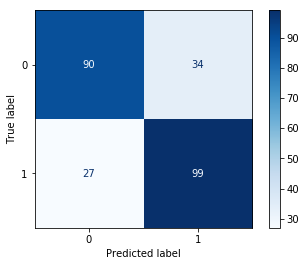

In [44]:
plot_confusion_matrix(diabetes_LR,X_teste,y_teste,cmap='Blues',values_format='.5g');

A acurácia preliminar do nosso modelo regressão logística apontou um valor de **75.6%**. Entretando não é a melhor forma de avaliar o modelo, o melhor seria aplicar um *cross validation*, onde utilizar partes diferentes do nosso conjunto de dados com o objetivo de avaliar a capacidade de generalização do modelo.

Acurácia do modelo sem *cross validation*.

In [45]:
metrics.accuracy_score(diabetes_pred,diabetes_real)*100

75.6

Acurácia do modelo com *cross validation*.

Vemos que a acurácia do modelo com *cross validation* caiu em mais de 0.8 ponto percentual. Isso mostra que esse modelo não teve um bom desempenho para generalização.

In [46]:
resultados = cross_val_predict(diabetes_LR,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados)*100)

74.8


#### Métricas de avaliação

A principais métricas de avaliação são a precisão, *recall* e *f1-score*.

Para a **classe 0** o modelo teve uma precisão de 74% e para a **classe 1** teve uma precisão de 76%. O *recall* das classes estão bastantes próximos da precisão. O *f1-score* é a média entre a precisão e o *recall*.

Podemos ver que a precisão média (média da precisão de cada classe) do modelo foi de 75%.

In [47]:
resultados=cross_val_predict(diabetes_LR,features,classe,cv=10)
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados,valor_classe))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       500
           1       0.76      0.73      0.74       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



## *Support Vector Machine*

O modelo *SVM* é um modelo de classificação que cria hiperplano para fazer a separação dos dados; por exemplo, se a relação entre os dados for de duas dimensões, será criada uma reta que melhor separa os dados, caso haja três dimensões o modelo irá gerar planos que irão separar os dados e, assim, sucessivamente conforme o número de dimensões. Esse modelo também permite a modificação dos seus *kernel* que podem ser linear, polinomial, sigmóide ou rbf, permitindo uma ampliação na acurácia do modelo.

O modelo *SVM*, diferente da regressão logística, pode ser usado para classificação multiclasse (mais de duas classes).

**Instanciando e treinando o modelo SVM**

In [48]:
diabetes_SVM=svm.SVC().fit(X_treino,y_treino)
diabetes_SVM

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Gerando as previsões do modelo *SVM*

In [49]:
diabetes_SVM.predict(X_teste)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

Atribuindo dos dados de previsão e reais a outras variáveis.

In [50]:
diabetes_pred2 = diabetes_SVM.predict(X_teste)
diabetes_real2 = y_teste

#### Matriz de confusão do modelo *SVM*

Novamente a classe 0 teve um desempenho menor que o da classe 1, em compensação as previsões para a classe 0 e 1 tiveram uma melhora.

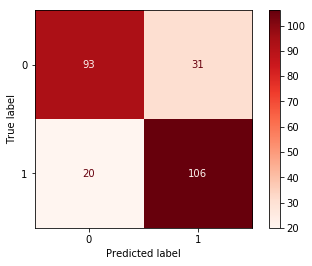

In [51]:
plot_confusion_matrix(diabetes_SVM,X_teste,y_teste,cmap='Reds',values_format='.5g');

A acurácia do modelo *SVM* sem validação cruzada foi de 79.6%, melhor que do modelo de regressão logística.

In [52]:
metrics.accuracy_score(diabetes_pred2,diabetes_real2)*100

79.60000000000001

Com validação cruzada o nosso modelo aumentou 0.2 ponto percentual, superior ao desempenho da regressão logística.

In [53]:
resultados2 = cross_val_predict(diabetes_SVM,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados2)*100)

79.80000000000001


#### Métrica de avaliação

A precisão do modelo para a classe 0 foi maior que a precisão da classe 1 (82% e 78%, respectivamente). O *recall* está um pouco discrepante em relação a precisão. Já a precisão média do modelo subiu, em relação a regressão logística.

In [54]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados2,valor_classe))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       500
           1       0.78      0.83      0.80       500

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



## Modelo do tipo árvore

Agora iremos utilizar modelo de classificação que utilizam a estrutura de árvore de decisão e serão ao todo cerca de 6 modelos.


## Modelo Árvore de Decisão (*Decision Tree*)

Enfim, iremos adentrar com os modelos do tipo árvore de regressão. O primeiro modelo do tipo árvore para classificação que iremos usar é a *Decision Tree* ou Árvore de decisão.

O modelo Árvore de Decisão é um modelo não paramétrico, ou seja, ele não gera parâmetros como ocorre no modelo de regressão linear. É um modelo que pode ser usado para resolução de problemas de classificação e de regressão, podendo gerar previsões categóricas ou numéricas.

A Árvore de Decisão é feita de nós e ramos e em cada nó uma das características dos dados é avaliado para dividir as observações no processo de treinamento ou para fazer um determinado ponto de dados seguir um determindado caminho ao fazer uma previsão. Quando as Árvores de Decisão são construídas, as *feautures* são avaliadas de forma recursiva e em cada nó há uma *feature* que melhor divide os dados.

A métricas usadas para o treinamento são a **entropia** (para problemas de classificação) e o **RMSE** (para problemas de regressão, que iremos usar).Vantagens desse modelo é que há a facilidade de interpretação (pode ser visto de maneira gráfica), pode ser treinada com poucos dados, são simples e tolerantes a valores ausentes. As desvantagens: propensos a *overfitting*, sensíveis a valores discrepantes e uma única árvore não gera boas previsões, por isso uma floresta é melhor.

Agora vamos treinar e instanciar esse modelo.

**Instanciando, treinando e gerando previsões com o modelo Árvore de Decisão**

In [55]:
decision_tree = DecisionTreeClassifier().fit(X_treino,y_treino)
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Gerando previsões com o modelo.

In [56]:
decision_tree.predict(X_teste)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

Atribuindo os valores reais e as previsões.

In [57]:
diabetes_pred3 = decision_tree.predict(X_teste)
diabetes_real3 = y_teste

#### Matriz de confusão

A matriz de confusão do modelo o desempenho da classe 0 ficou aquém, em relação aos dois modelos anteriores. Para a classe 1 o desempenho foi pior que o *SVM* e pior que a regressão logística.

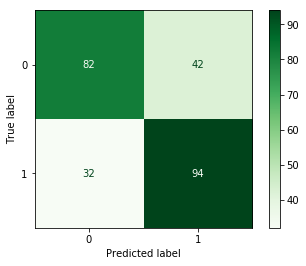

In [58]:
plot_confusion_matrix(decision_tree,X_teste,y_teste,cmap='Greens',values_format='.5g');

A acurácia sem validação cruzada é a menor até o momento, sendo de 70.4%.

In [59]:
metrics.accuracy_score(diabetes_pred3,diabetes_real3)*100

70.39999999999999

Com a validação cruzada o modelo ficou abaixo do modelo anterior.

In [60]:
resultados3 = cross_val_predict(decision_tree,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados3)*100)

76.8


#### Métricas de avaliação

A piora de desempenho do modelo pode ser vista nas métricas de avaliação. A precisão, o *recall* e o *f1-score* em todas as classes caíram.

In [61]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados3,valor_classe))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       500
           1       0.76      0.79      0.77       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



In [123]:
#from sklearn.tree import plot_tree
#plt.figure(figsize=(20,10))
#plot_tree(random, filled=True,fontsize=2,proportion=True)
#plt.show()

## *Random Forest* (Floresta aleatória)

Agora vamos usar outro modelo bastante conhecido, que é a *Random Forest* ou Floresta aleatória, que como o próprio nome infere trata-se de vários modelos do tipo árvore que são gerados. São árvore de decisão individuais que operam em conjunto. Cada uma das ávores na *Random Forest* exibe um previsão e cada uma dessas previsões são usadas para gerar a previsão final do modelo.

Um dos conceitos por trás da *Random Forest* é o de *sabedoria das multidões*, ou seja, um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê, terão um desempenho melhor do que qualquer um dos modelos constituintes individuais.

O segredo é a baixa correlação entre os modelos e isso faz com que as árvores protejam umas as outras de seus erros individuais (contando que não errem na mesma direção), assim se algumas estiverem erradas as outras poderão estar corretas.

Para que a *Random Forest* tenham um bom desempenho, precisamos que:

1) Deve haver nas *features* algum sinal de que esses recursos tenham algum poder de previsão melhor que a mera aleatoriedade;

2) Baixa correlação entre as previsões.

Como a *Random Forest* garante a baixa correlação ?

O modelo *Random Forest* utiliza o método *Bagging*, em que a *Random Forest* faz uma amostragem do conjunto de dados com substituição resultando em árvores diferentes (esse método também pode ser chamado de *Bootstrap*). Se temos um conjunto com *N* observações, treinaremos árvores com *N* observações.

Na *Random Forest*, a árvore, para dividir o nós, considera todas as características possíveis e escolhe a que produz maior separação entre as observações no nó esquerdo e aquelas do nó direito. A *Random Forest* pode escolher apenas um subconjunto aleatório de recursos. Isso força a variação de árvores e gera menores correlações e mais diversificação. A *Random Forest* treina conjuntos de dados diferentes e *features* diferentes.

Vamos agora aplizar o nosso modelo de *Random Forest*.

In [62]:
random = RandomForestClassifier().fit(X_treino,y_treino)
random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Gerando as previsões.

In [63]:
random.predict(X_teste)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

Atribundo a variáveis aos valores preditos e reais.

In [64]:
diabetes_pred4 = random.predict(X_teste)
diabetes_real4 = y_teste

#### Matriz de confusão

A classe 1 teve mais acertos que a classe 0, porém os resultados ficaram mais próximos. Apenas o desempenho da classe 0 conseguiu superar o desempenho da classe 0 do *SVM*.

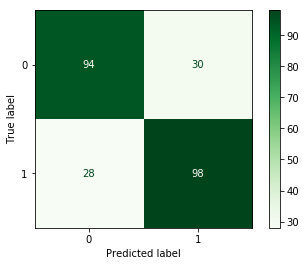

In [65]:
plot_confusion_matrix(random,X_teste,y_teste,cmap='Greens',values_format='.5g');

Acurácia sem *cross validation*.

In [66]:
metrics.accuracy_score(diabetes_pred4,diabetes_real4)*100

76.8

Acurácia com *cross validation*.

In [67]:
resultados4 = cross_val_predict(random,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados4)*100)

82.69999999999999


#### Métricas de avaliação

As precisões das classes e o *recall* de cada classe superaram o resultado do modelo *SVM*.

In [68]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados4,valor_classe))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       500
           1       0.81      0.85      0.83       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



## *Extra Tree*

Esse algoritmo é conhecido como *Árvore Extremamente Aleatorizada* e tem por objetivo a construção de uam árvore mais aleatória no contexto de *features* numéricas. Esse algoritmo abandona a abordagem *Bootstrap* de amostragem para a aprendizagem e ao invés de encontrar um ponto de corte ideal para cada *k* *feature* escolhida em cada nó da árvore, ele escolhe aleatoriamente.

Essa ideia é produtiva no contexto caracterizado por um grande número de *features* numéricas variando mais ou menos continuamente, o que acaba gerando maior precisão. Abandonar o *Bootstrap* leva a uma vantagem em termo de viés e a *randomização* reduz a variância.

Vamos agora instancia e treinar o modelo.

In [69]:
extra=ExtraTreesClassifier().fit(X_treino,y_treino)
extra

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Gerando as previsões.

In [70]:
extra.predict(X_teste)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

atribuindo os valores a variáveis.

In [71]:
diabetes_pred5 = extra.predict(X_teste)
diabetes_real5 = y_teste

#### Matriz de confusão

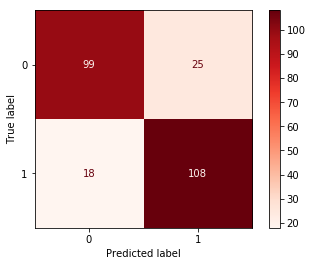

In [72]:
plot_confusion_matrix(extra,X_teste,y_teste,cmap='Reds',values_format='.5g');

Acurácia sem *cross validation*.

In [73]:
metrics.accuracy_score(diabetes_pred5,diabetes_real5)*100

82.8

Acurácia com *cross validation*.

In [74]:
resultados5 = cross_val_predict(extra,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados5)*100)

84.89999999999999


#### Métricas de avaliação

Em relação ao modelo anterior as métricas melhoraram muito. A precisão média subiu para 85%.

In [75]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados5,valor_classe))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       500
           1       0.83      0.88      0.85       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



## *LightGBM*

O algoritmo *LightGBM* é um modelo que utiliza uma abordagem unilaterial. Enquanto os demais algoritmos do tipo árvore criam árvores equilibradas, esse modelo usa apenas uma parte de uma árvore, por assim dizer. Esse modelo opta por fazer crescer folhas que minimizem a perda e por isso a árvore cresce desequilibrada. Como o crescimento é por folha podemos ter o problema de *overfitting*, por isso é sempre bom controlar a profundidade desse modelo.

Uma das vantagens dp *Light GBM* é a sua velocidade, sua capacidade de lidar com o grande tamanho de dados e leva menos memória para ser executado e a sua concentração na precisão dos resultados. Uma outra desvantagem desse modelo, além da alta chance de *overfitting* é a dificuldade em ajustar seus parâmetros.

Instanciando e treinando o modelo.

In [76]:
light=lgb.LGBMClassifier().fit(X_treino,y_treino)
light

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=1)

Gerando as previsões.

In [77]:
light.predict(X_teste)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

Atribuindo a variáveis as previsões e os valores reais.

In [78]:
diabetes_pred6 = light.predict(X_teste)
diabetes_real6 = y_teste

#### Matriz de confusão

Para a classe 0 o modelo acertou 91 observações e para a classe 1 acertou 104. Dentre os algoritmos, esse teve um bom desempenho, mas não superou a *Extra Tree*.

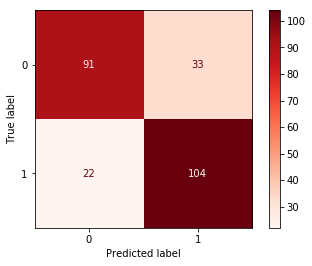

In [79]:
plot_confusion_matrix(light,X_teste,y_teste,cmap='Reds',values_format='.5g');

A acurácia sem *cross validation* foi de 78%.

In [80]:
metrics.accuracy_score(diabetes_pred6,diabetes_real6)*100

78.0

Com *cross validation* a acurácia foi de 80.9%.

In [81]:
resultados6 = cross_val_predict(light,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados6)*100)

80.9


#### Métricas de avaliação

O modelo, para a classe 0 e 1, teve precisões, respectivamente, de 82% e 80%. O valores de seus *recall's* está próximo da precisão. A precisão média é de 81%

In [82]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados6,valor_classe))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       500
           1       0.80      0.83      0.81       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



## *XGBoost*

O algoritmo *XGBoost* não utiliza nenhuma técnica de amostragem ponderada e seu processo de divisão de dados é mais lento. Divide os dados até o hiperparâmetro *max_depth* especificado e, em seguida, poda a árvore para trás e remove as divisões além das quais não há ganho positivo. Esse modelo faz isso, pois uam divisão sem redução de perda pode ser seguida por uma divisão com redução de perda.

Esse algoritmo é confiável, muito poderoso, mas complexo e por conta dessas características pode é bastante popular. Pode trazer resultados acurados para problemas de classificação.

Treinando e instanciando o modelo.

In [83]:
xgboost= xgb.XGBClassifier().fit(X_treino,y_treino)
xgboost

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Gerando as previsões.

In [84]:
xgboost.predict(X_teste)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

Atribuindo à variáveis os valores reais e preditos.

In [85]:
diabetes_pred7 = xgboost.predict(X_teste)
diabetes_real7 = y_teste

#### Matriz de confusão

O modelo, para a classe 0, acertou 88 valores, enquanto para a classe 1 ele acertou 100.

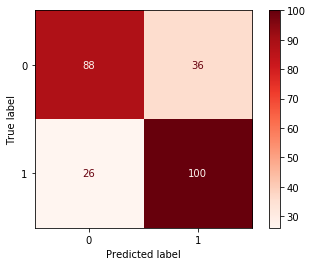

In [86]:
plot_confusion_matrix(xgboost,X_teste,y_teste,cmap='Reds',values_format='.5g');

Acurácia do modelo sem *cross validation*.

In [87]:
metrics.accuracy_score(diabetes_pred7,diabetes_real7)*100

75.2

Acurácia do modelo com *cross validation*.

In [88]:
resultados7 = cross_val_predict(xgboost,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados7)*100)

79.7


#### Métricas de avaliação

Os resultados não saíram muito da média dos modelos gerados.

In [89]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados7,valor_classe))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       500
           1       0.79      0.82      0.80       500

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



## *Cat Boost*

Esse modelo muitas vezes consegue superar os modelos anteriores, principalmente por conta da sua velocidade de aplicação. Diferente dos outros modelos do tipo *boosting* esse modelo cria árvores simétricas e isso diminui o tempo de previsão do modelo. A divisão dos dados se dá criação de permutações aletaórias do conjunto de dados e aplica o aumento ordenado dessas permutações (geralmente esse modelo cria 4 permutações aleatórias). Além disso, o *CatBoost* representa internamente todas *features* categóricas com codificação *One-hot* se, e somente se, uma *feature* categórica tiver duas categorias diferentes.

Vamos instanciar e treinar o modelo.

In [90]:
catboost=CatBoostClassifier().fit(X_treino,y_treino)

Learning rate set to 0.009111
0:	learn: 0.6879315	total: 215ms	remaining: 3m 34s
1:	learn: 0.6829624	total: 217ms	remaining: 1m 48s
2:	learn: 0.6789466	total: 220ms	remaining: 1m 12s
3:	learn: 0.6732332	total: 222ms	remaining: 55.3s
4:	learn: 0.6684614	total: 224ms	remaining: 44.6s
5:	learn: 0.6639846	total: 226ms	remaining: 37.4s
6:	learn: 0.6590405	total: 228ms	remaining: 32.3s
7:	learn: 0.6550122	total: 231ms	remaining: 28.6s
8:	learn: 0.6507123	total: 234ms	remaining: 25.8s
9:	learn: 0.6457191	total: 237ms	remaining: 23.4s
10:	learn: 0.6409536	total: 239ms	remaining: 21.5s
11:	learn: 0.6378684	total: 241ms	remaining: 19.9s
12:	learn: 0.6338575	total: 245ms	remaining: 18.6s
13:	learn: 0.6289090	total: 248ms	remaining: 17.5s
14:	learn: 0.6243085	total: 251ms	remaining: 16.5s
15:	learn: 0.6200169	total: 255ms	remaining: 15.7s
16:	learn: 0.6156629	total: 258ms	remaining: 14.9s
17:	learn: 0.6117748	total: 260ms	remaining: 14.2s
18:	learn: 0.6083242	total: 265ms	remaining: 13.7s
19:	lear

166:	learn: 0.3841327	total: 706ms	remaining: 3.52s
167:	learn: 0.3833736	total: 709ms	remaining: 3.51s
168:	learn: 0.3827091	total: 712ms	remaining: 3.5s
169:	learn: 0.3821020	total: 715ms	remaining: 3.49s
170:	learn: 0.3817504	total: 717ms	remaining: 3.48s
171:	learn: 0.3810629	total: 720ms	remaining: 3.47s
172:	learn: 0.3802477	total: 723ms	remaining: 3.46s
173:	learn: 0.3800045	total: 726ms	remaining: 3.44s
174:	learn: 0.3794149	total: 728ms	remaining: 3.43s
175:	learn: 0.3788560	total: 732ms	remaining: 3.42s
176:	learn: 0.3782772	total: 734ms	remaining: 3.41s
177:	learn: 0.3777718	total: 737ms	remaining: 3.4s
178:	learn: 0.3769039	total: 742ms	remaining: 3.4s
179:	learn: 0.3762472	total: 745ms	remaining: 3.39s
180:	learn: 0.3756378	total: 748ms	remaining: 3.38s
181:	learn: 0.3750586	total: 751ms	remaining: 3.37s
182:	learn: 0.3745334	total: 753ms	remaining: 3.36s
183:	learn: 0.3741032	total: 759ms	remaining: 3.36s
184:	learn: 0.3735771	total: 761ms	remaining: 3.35s
185:	learn: 0.3

331:	learn: 0.3115974	total: 1.2s	remaining: 2.41s
332:	learn: 0.3112604	total: 1.2s	remaining: 2.4s
333:	learn: 0.3109878	total: 1.2s	remaining: 2.4s
334:	learn: 0.3106330	total: 1.2s	remaining: 2.39s
335:	learn: 0.3102410	total: 1.21s	remaining: 2.38s
336:	learn: 0.3098790	total: 1.21s	remaining: 2.38s
337:	learn: 0.3095039	total: 1.21s	remaining: 2.37s
338:	learn: 0.3092690	total: 1.21s	remaining: 2.37s
339:	learn: 0.3090161	total: 1.22s	remaining: 2.36s
340:	learn: 0.3087116	total: 1.22s	remaining: 2.36s
341:	learn: 0.3084959	total: 1.22s	remaining: 2.35s
342:	learn: 0.3081484	total: 1.23s	remaining: 2.35s
343:	learn: 0.3077248	total: 1.23s	remaining: 2.35s
344:	learn: 0.3074655	total: 1.23s	remaining: 2.34s
345:	learn: 0.3073352	total: 1.24s	remaining: 2.34s
346:	learn: 0.3069269	total: 1.24s	remaining: 2.33s
347:	learn: 0.3065136	total: 1.25s	remaining: 2.33s
348:	learn: 0.3062094	total: 1.25s	remaining: 2.33s
349:	learn: 0.3057522	total: 1.25s	remaining: 2.32s
350:	learn: 0.3055

506:	learn: 0.2615543	total: 1.68s	remaining: 1.63s
507:	learn: 0.2612094	total: 1.68s	remaining: 1.63s
508:	learn: 0.2608795	total: 1.69s	remaining: 1.63s
509:	learn: 0.2605554	total: 1.69s	remaining: 1.62s
510:	learn: 0.2604378	total: 1.69s	remaining: 1.62s
511:	learn: 0.2602204	total: 1.69s	remaining: 1.61s
512:	learn: 0.2599525	total: 1.7s	remaining: 1.61s
513:	learn: 0.2597830	total: 1.7s	remaining: 1.61s
514:	learn: 0.2594828	total: 1.7s	remaining: 1.6s
515:	learn: 0.2592418	total: 1.71s	remaining: 1.6s
516:	learn: 0.2590847	total: 1.71s	remaining: 1.6s
517:	learn: 0.2587325	total: 1.71s	remaining: 1.59s
518:	learn: 0.2583351	total: 1.72s	remaining: 1.59s
519:	learn: 0.2579333	total: 1.72s	remaining: 1.59s
520:	learn: 0.2576323	total: 1.72s	remaining: 1.58s
521:	learn: 0.2573675	total: 1.72s	remaining: 1.58s
522:	learn: 0.2570075	total: 1.73s	remaining: 1.57s
523:	learn: 0.2568119	total: 1.73s	remaining: 1.57s
524:	learn: 0.2565937	total: 1.73s	remaining: 1.57s
525:	learn: 0.2562

679:	learn: 0.2229818	total: 2.17s	remaining: 1.02s
680:	learn: 0.2228010	total: 2.18s	remaining: 1.02s
681:	learn: 0.2226157	total: 2.18s	remaining: 1.02s
682:	learn: 0.2223861	total: 2.18s	remaining: 1.01s
683:	learn: 0.2220766	total: 2.19s	remaining: 1.01s
684:	learn: 0.2219137	total: 2.19s	remaining: 1.01s
685:	learn: 0.2217161	total: 2.19s	remaining: 1s
686:	learn: 0.2213995	total: 2.19s	remaining: 1000ms
687:	learn: 0.2211877	total: 2.2s	remaining: 997ms
688:	learn: 0.2210441	total: 2.2s	remaining: 993ms
689:	learn: 0.2206918	total: 2.2s	remaining: 989ms
690:	learn: 0.2205993	total: 2.21s	remaining: 986ms
691:	learn: 0.2204166	total: 2.21s	remaining: 983ms
692:	learn: 0.2201509	total: 2.21s	remaining: 979ms
693:	learn: 0.2198919	total: 2.21s	remaining: 976ms
694:	learn: 0.2197743	total: 2.21s	remaining: 972ms
695:	learn: 0.2195864	total: 2.22s	remaining: 969ms
696:	learn: 0.2193438	total: 2.22s	remaining: 965ms
697:	learn: 0.2190624	total: 2.22s	remaining: 962ms
698:	learn: 0.218

854:	learn: 0.1885399	total: 2.66s	remaining: 452ms
855:	learn: 0.1883927	total: 2.67s	remaining: 449ms
856:	learn: 0.1883099	total: 2.67s	remaining: 446ms
857:	learn: 0.1881199	total: 2.67s	remaining: 442ms
858:	learn: 0.1879038	total: 2.67s	remaining: 439ms
859:	learn: 0.1878099	total: 2.68s	remaining: 436ms
860:	learn: 0.1874908	total: 2.68s	remaining: 433ms
861:	learn: 0.1872337	total: 2.68s	remaining: 429ms
862:	learn: 0.1871230	total: 2.68s	remaining: 426ms
863:	learn: 0.1868732	total: 2.69s	remaining: 423ms
864:	learn: 0.1867192	total: 2.69s	remaining: 420ms
865:	learn: 0.1865686	total: 2.69s	remaining: 417ms
866:	learn: 0.1864347	total: 2.69s	remaining: 414ms
867:	learn: 0.1862468	total: 2.7s	remaining: 410ms
868:	learn: 0.1861839	total: 2.7s	remaining: 407ms
869:	learn: 0.1860309	total: 2.7s	remaining: 404ms
870:	learn: 0.1858688	total: 2.71s	remaining: 401ms
871:	learn: 0.1857719	total: 2.71s	remaining: 397ms
872:	learn: 0.1856374	total: 2.71s	remaining: 394ms
873:	learn: 0.1

Gerando as previsões.

In [91]:
catboost.predict(X_teste)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

Atribuindo à variáveis as previsões e os valores reais.

In [92]:
diabetes_pred8 = catboost.predict(X_teste)
diabetes_real8 =y_teste

#### Matriz de confusão

O modelo *CatBoost* teve o mesmo resultado da Regressão Logística.

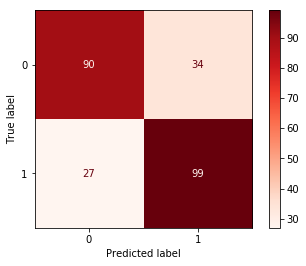

In [93]:
plot_confusion_matrix(catboost,X_teste,y_teste,cmap='Reds',values_format='.5g');

Acurácia do modelo sem *cross validation*.

In [94]:
metrics.accuracy_score(diabetes_pred8,diabetes_real8)*100

75.6

A acurácia com a validação cruzada aumento em relação a acurácia sem a validação cruzada: subiu de 75.6% para 80.5%.

In [95]:
resultados8 = cross_val_predict(catboost,features,classe,cv=10)
print(metrics.accuracy_score(classe,resultados8)*100)

Learning rate set to 0.009849
0:	learn: 0.6885270	total: 3.58ms	remaining: 3.57s
1:	learn: 0.6842397	total: 7.83ms	remaining: 3.91s
2:	learn: 0.6792364	total: 10.4ms	remaining: 3.45s
3:	learn: 0.6735318	total: 13.4ms	remaining: 3.33s
4:	learn: 0.6690637	total: 16.5ms	remaining: 3.29s
5:	learn: 0.6642510	total: 19.5ms	remaining: 3.24s
6:	learn: 0.6588461	total: 22.1ms	remaining: 3.14s
7:	learn: 0.6543963	total: 26ms	remaining: 3.22s
8:	learn: 0.6494319	total: 30.6ms	remaining: 3.37s
9:	learn: 0.6447790	total: 34.3ms	remaining: 3.39s
10:	learn: 0.6400365	total: 40.2ms	remaining: 3.62s
11:	learn: 0.6362428	total: 43.6ms	remaining: 3.59s
12:	learn: 0.6330575	total: 46.7ms	remaining: 3.54s
13:	learn: 0.6290126	total: 50.9ms	remaining: 3.59s
14:	learn: 0.6254820	total: 54.6ms	remaining: 3.58s
15:	learn: 0.6218819	total: 57.6ms	remaining: 3.54s
16:	learn: 0.6183577	total: 60.6ms	remaining: 3.5s
17:	learn: 0.6150439	total: 64.5ms	remaining: 3.52s
18:	learn: 0.6111824	total: 67.3ms	remaining: 3

206:	learn: 0.3684375	total: 658ms	remaining: 2.52s
207:	learn: 0.3681093	total: 661ms	remaining: 2.52s
208:	learn: 0.3677114	total: 664ms	remaining: 2.51s
209:	learn: 0.3673263	total: 667ms	remaining: 2.51s
210:	learn: 0.3669200	total: 670ms	remaining: 2.5s
211:	learn: 0.3664383	total: 673ms	remaining: 2.5s
212:	learn: 0.3660038	total: 676ms	remaining: 2.5s
213:	learn: 0.3655911	total: 678ms	remaining: 2.49s
214:	learn: 0.3651600	total: 682ms	remaining: 2.49s
215:	learn: 0.3644546	total: 685ms	remaining: 2.48s
216:	learn: 0.3639815	total: 687ms	remaining: 2.48s
217:	learn: 0.3631677	total: 690ms	remaining: 2.47s
218:	learn: 0.3625834	total: 692ms	remaining: 2.47s
219:	learn: 0.3621623	total: 696ms	remaining: 2.47s
220:	learn: 0.3617779	total: 700ms	remaining: 2.47s
221:	learn: 0.3613214	total: 703ms	remaining: 2.46s
222:	learn: 0.3605748	total: 707ms	remaining: 2.46s
223:	learn: 0.3600752	total: 710ms	remaining: 2.46s
224:	learn: 0.3595428	total: 713ms	remaining: 2.46s
225:	learn: 0.3

367:	learn: 0.3071290	total: 1.15s	remaining: 1.98s
368:	learn: 0.3067310	total: 1.16s	remaining: 1.98s
369:	learn: 0.3064206	total: 1.16s	remaining: 1.97s
370:	learn: 0.3057745	total: 1.16s	remaining: 1.97s
371:	learn: 0.3054871	total: 1.17s	remaining: 1.97s
372:	learn: 0.3052309	total: 1.17s	remaining: 1.96s
373:	learn: 0.3050486	total: 1.17s	remaining: 1.96s
374:	learn: 0.3047021	total: 1.17s	remaining: 1.96s
375:	learn: 0.3045454	total: 1.18s	remaining: 1.95s
376:	learn: 0.3041598	total: 1.18s	remaining: 1.95s
377:	learn: 0.3039880	total: 1.18s	remaining: 1.95s
378:	learn: 0.3036060	total: 1.19s	remaining: 1.95s
379:	learn: 0.3033521	total: 1.19s	remaining: 1.94s
380:	learn: 0.3029709	total: 1.19s	remaining: 1.94s
381:	learn: 0.3027424	total: 1.2s	remaining: 1.94s
382:	learn: 0.3024461	total: 1.2s	remaining: 1.93s
383:	learn: 0.3021030	total: 1.2s	remaining: 1.93s
384:	learn: 0.3019148	total: 1.21s	remaining: 1.93s
385:	learn: 0.3015329	total: 1.21s	remaining: 1.93s
386:	learn: 0.3

575:	learn: 0.2561657	total: 1.82s	remaining: 1.34s
576:	learn: 0.2559768	total: 1.82s	remaining: 1.34s
577:	learn: 0.2557481	total: 1.83s	remaining: 1.33s
578:	learn: 0.2554834	total: 1.83s	remaining: 1.33s
579:	learn: 0.2553505	total: 1.83s	remaining: 1.33s
580:	learn: 0.2552025	total: 1.84s	remaining: 1.32s
581:	learn: 0.2548886	total: 1.84s	remaining: 1.32s
582:	learn: 0.2547306	total: 1.84s	remaining: 1.32s
583:	learn: 0.2544562	total: 1.84s	remaining: 1.31s
584:	learn: 0.2542012	total: 1.85s	remaining: 1.31s
585:	learn: 0.2539858	total: 1.85s	remaining: 1.31s
586:	learn: 0.2537921	total: 1.85s	remaining: 1.3s
587:	learn: 0.2536296	total: 1.86s	remaining: 1.3s
588:	learn: 0.2535050	total: 1.86s	remaining: 1.3s
589:	learn: 0.2533183	total: 1.86s	remaining: 1.29s
590:	learn: 0.2530486	total: 1.87s	remaining: 1.29s
591:	learn: 0.2527240	total: 1.87s	remaining: 1.29s
592:	learn: 0.2524661	total: 1.87s	remaining: 1.29s
593:	learn: 0.2521826	total: 1.88s	remaining: 1.28s
594:	learn: 0.2

737:	learn: 0.2220245	total: 2.31s	remaining: 821ms
738:	learn: 0.2219448	total: 2.31s	remaining: 818ms
739:	learn: 0.2218148	total: 2.32s	remaining: 815ms
740:	learn: 0.2216274	total: 2.32s	remaining: 812ms
741:	learn: 0.2215542	total: 2.32s	remaining: 808ms
742:	learn: 0.2212506	total: 2.33s	remaining: 805ms
743:	learn: 0.2211386	total: 2.33s	remaining: 802ms
744:	learn: 0.2209791	total: 2.33s	remaining: 798ms
745:	learn: 0.2207395	total: 2.33s	remaining: 795ms
746:	learn: 0.2205395	total: 2.34s	remaining: 792ms
747:	learn: 0.2203414	total: 2.34s	remaining: 788ms
748:	learn: 0.2200517	total: 2.34s	remaining: 785ms
749:	learn: 0.2198283	total: 2.35s	remaining: 782ms
750:	learn: 0.2196638	total: 2.35s	remaining: 778ms
751:	learn: 0.2194254	total: 2.35s	remaining: 775ms
752:	learn: 0.2192861	total: 2.35s	remaining: 772ms
753:	learn: 0.2191549	total: 2.36s	remaining: 769ms
754:	learn: 0.2188881	total: 2.36s	remaining: 765ms
755:	learn: 0.2186140	total: 2.36s	remaining: 762ms
756:	learn: 

901:	learn: 0.1927284	total: 2.8s	remaining: 304ms
902:	learn: 0.1924924	total: 2.8s	remaining: 301ms
903:	learn: 0.1923023	total: 2.81s	remaining: 298ms
904:	learn: 0.1920944	total: 2.81s	remaining: 295ms
905:	learn: 0.1919114	total: 2.81s	remaining: 292ms
906:	learn: 0.1918307	total: 2.81s	remaining: 289ms
907:	learn: 0.1915707	total: 2.82s	remaining: 286ms
908:	learn: 0.1913103	total: 2.82s	remaining: 283ms
909:	learn: 0.1911640	total: 2.83s	remaining: 280ms
910:	learn: 0.1910610	total: 2.83s	remaining: 276ms
911:	learn: 0.1908607	total: 2.83s	remaining: 273ms
912:	learn: 0.1906868	total: 2.83s	remaining: 270ms
913:	learn: 0.1905527	total: 2.84s	remaining: 267ms
914:	learn: 0.1902704	total: 2.84s	remaining: 264ms
915:	learn: 0.1901363	total: 2.84s	remaining: 261ms
916:	learn: 0.1900221	total: 2.85s	remaining: 258ms
917:	learn: 0.1898679	total: 2.85s	remaining: 255ms
918:	learn: 0.1897518	total: 2.85s	remaining: 252ms
919:	learn: 0.1896365	total: 2.86s	remaining: 248ms
920:	learn: 0.

100:	learn: 0.4551908	total: 325ms	remaining: 2.89s
101:	learn: 0.4540731	total: 328ms	remaining: 2.89s
102:	learn: 0.4531371	total: 331ms	remaining: 2.88s
103:	learn: 0.4522018	total: 334ms	remaining: 2.88s
104:	learn: 0.4510553	total: 337ms	remaining: 2.87s
105:	learn: 0.4499472	total: 340ms	remaining: 2.86s
106:	learn: 0.4487880	total: 343ms	remaining: 2.86s
107:	learn: 0.4478177	total: 347ms	remaining: 2.87s
108:	learn: 0.4466539	total: 350ms	remaining: 2.86s
109:	learn: 0.4456906	total: 354ms	remaining: 2.87s
110:	learn: 0.4448010	total: 357ms	remaining: 2.85s
111:	learn: 0.4434609	total: 360ms	remaining: 2.85s
112:	learn: 0.4427065	total: 362ms	remaining: 2.85s
113:	learn: 0.4420651	total: 366ms	remaining: 2.85s
114:	learn: 0.4412793	total: 369ms	remaining: 2.84s
115:	learn: 0.4402183	total: 372ms	remaining: 2.83s
116:	learn: 0.4394961	total: 377ms	remaining: 2.85s
117:	learn: 0.4387202	total: 380ms	remaining: 2.84s
118:	learn: 0.4378802	total: 383ms	remaining: 2.83s
119:	learn: 

274:	learn: 0.3510355	total: 979ms	remaining: 2.58s
275:	learn: 0.3507476	total: 981ms	remaining: 2.57s
276:	learn: 0.3503424	total: 985ms	remaining: 2.57s
277:	learn: 0.3499187	total: 988ms	remaining: 2.56s
278:	learn: 0.3495761	total: 992ms	remaining: 2.56s
279:	learn: 0.3493157	total: 998ms	remaining: 2.57s
280:	learn: 0.3487327	total: 1s	remaining: 2.57s
281:	learn: 0.3483342	total: 1.01s	remaining: 2.57s
282:	learn: 0.3482095	total: 1.01s	remaining: 2.57s
283:	learn: 0.3478065	total: 1.02s	remaining: 2.56s
284:	learn: 0.3474444	total: 1.02s	remaining: 2.56s
285:	learn: 0.3471667	total: 1.02s	remaining: 2.56s
286:	learn: 0.3468676	total: 1.03s	remaining: 2.56s
287:	learn: 0.3464019	total: 1.03s	remaining: 2.56s
288:	learn: 0.3458960	total: 1.04s	remaining: 2.55s
289:	learn: 0.3453692	total: 1.04s	remaining: 2.55s
290:	learn: 0.3451413	total: 1.04s	remaining: 2.54s
291:	learn: 0.3446461	total: 1.05s	remaining: 2.54s
292:	learn: 0.3441697	total: 1.05s	remaining: 2.54s
293:	learn: 0.3

473:	learn: 0.2897004	total: 1.64s	remaining: 1.82s
474:	learn: 0.2894561	total: 1.64s	remaining: 1.81s
475:	learn: 0.2890601	total: 1.65s	remaining: 1.81s
476:	learn: 0.2888007	total: 1.65s	remaining: 1.81s
477:	learn: 0.2885438	total: 1.65s	remaining: 1.81s
478:	learn: 0.2883591	total: 1.66s	remaining: 1.8s
479:	learn: 0.2881408	total: 1.66s	remaining: 1.8s
480:	learn: 0.2878348	total: 1.67s	remaining: 1.8s
481:	learn: 0.2874567	total: 1.67s	remaining: 1.79s
482:	learn: 0.2871671	total: 1.68s	remaining: 1.79s
483:	learn: 0.2869432	total: 1.68s	remaining: 1.79s
484:	learn: 0.2867915	total: 1.68s	remaining: 1.78s
485:	learn: 0.2866618	total: 1.68s	remaining: 1.78s
486:	learn: 0.2863769	total: 1.69s	remaining: 1.78s
487:	learn: 0.2860950	total: 1.69s	remaining: 1.77s
488:	learn: 0.2856996	total: 1.69s	remaining: 1.77s
489:	learn: 0.2854129	total: 1.7s	remaining: 1.76s
490:	learn: 0.2852028	total: 1.7s	remaining: 1.76s
491:	learn: 0.2849026	total: 1.7s	remaining: 1.76s
492:	learn: 0.2847

632:	learn: 0.2518814	total: 2.13s	remaining: 1.23s
633:	learn: 0.2516278	total: 2.13s	remaining: 1.23s
634:	learn: 0.2514412	total: 2.14s	remaining: 1.23s
635:	learn: 0.2513716	total: 2.14s	remaining: 1.22s
636:	learn: 0.2511618	total: 2.14s	remaining: 1.22s
637:	learn: 0.2509700	total: 2.14s	remaining: 1.22s
638:	learn: 0.2507027	total: 2.15s	remaining: 1.21s
639:	learn: 0.2505060	total: 2.15s	remaining: 1.21s
640:	learn: 0.2502838	total: 2.15s	remaining: 1.21s
641:	learn: 0.2500756	total: 2.16s	remaining: 1.2s
642:	learn: 0.2497949	total: 2.16s	remaining: 1.2s
643:	learn: 0.2495624	total: 2.16s	remaining: 1.19s
644:	learn: 0.2492363	total: 2.16s	remaining: 1.19s
645:	learn: 0.2490758	total: 2.17s	remaining: 1.19s
646:	learn: 0.2488978	total: 2.17s	remaining: 1.18s
647:	learn: 0.2486239	total: 2.17s	remaining: 1.18s
648:	learn: 0.2483039	total: 2.17s	remaining: 1.18s
649:	learn: 0.2480583	total: 2.18s	remaining: 1.17s
650:	learn: 0.2479442	total: 2.18s	remaining: 1.17s
651:	learn: 0.

840:	learn: 0.2120903	total: 2.77s	remaining: 524ms
841:	learn: 0.2119933	total: 2.78s	remaining: 521ms
842:	learn: 0.2119381	total: 2.78s	remaining: 518ms
843:	learn: 0.2117830	total: 2.78s	remaining: 514ms
844:	learn: 0.2116012	total: 2.79s	remaining: 511ms
845:	learn: 0.2114712	total: 2.79s	remaining: 508ms
846:	learn: 0.2111291	total: 2.79s	remaining: 504ms
847:	learn: 0.2108909	total: 2.79s	remaining: 501ms
848:	learn: 0.2107392	total: 2.8s	remaining: 498ms
849:	learn: 0.2105537	total: 2.8s	remaining: 495ms
850:	learn: 0.2103040	total: 2.81s	remaining: 491ms
851:	learn: 0.2101682	total: 2.81s	remaining: 488ms
852:	learn: 0.2098096	total: 2.81s	remaining: 485ms
853:	learn: 0.2096196	total: 2.81s	remaining: 481ms
854:	learn: 0.2094224	total: 2.82s	remaining: 478ms
855:	learn: 0.2093037	total: 2.82s	remaining: 475ms
856:	learn: 0.2091714	total: 2.83s	remaining: 472ms
857:	learn: 0.2091332	total: 2.83s	remaining: 468ms
858:	learn: 0.2089529	total: 2.83s	remaining: 465ms
859:	learn: 0.

Learning rate set to 0.009849
0:	learn: 0.6876520	total: 3.88ms	remaining: 3.88s
1:	learn: 0.6832293	total: 10.3ms	remaining: 5.12s
2:	learn: 0.6787821	total: 13.7ms	remaining: 4.55s
3:	learn: 0.6738405	total: 17.9ms	remaining: 4.46s
4:	learn: 0.6688662	total: 21.1ms	remaining: 4.19s
5:	learn: 0.6637234	total: 24.6ms	remaining: 4.08s
6:	learn: 0.6588789	total: 27.8ms	remaining: 3.94s
7:	learn: 0.6546891	total: 32.3ms	remaining: 4.01s
8:	learn: 0.6493282	total: 36.1ms	remaining: 3.97s
9:	learn: 0.6456664	total: 39ms	remaining: 3.86s
10:	learn: 0.6411089	total: 42.7ms	remaining: 3.84s
11:	learn: 0.6373942	total: 46.1ms	remaining: 3.79s
12:	learn: 0.6341220	total: 49.4ms	remaining: 3.75s
13:	learn: 0.6303054	total: 53ms	remaining: 3.73s
14:	learn: 0.6266461	total: 55.9ms	remaining: 3.67s
15:	learn: 0.6225117	total: 58.8ms	remaining: 3.62s
16:	learn: 0.6183386	total: 61.7ms	remaining: 3.57s
17:	learn: 0.6146103	total: 64.7ms	remaining: 3.53s
18:	learn: 0.6106380	total: 68.6ms	remaining: 3.

187:	learn: 0.3828287	total: 676ms	remaining: 2.92s
188:	learn: 0.3821467	total: 679ms	remaining: 2.91s
189:	learn: 0.3817119	total: 683ms	remaining: 2.91s
190:	learn: 0.3811956	total: 685ms	remaining: 2.9s
191:	learn: 0.3802721	total: 688ms	remaining: 2.9s
192:	learn: 0.3798329	total: 691ms	remaining: 2.89s
193:	learn: 0.3794689	total: 694ms	remaining: 2.88s
194:	learn: 0.3788032	total: 700ms	remaining: 2.89s
195:	learn: 0.3782572	total: 703ms	remaining: 2.88s
196:	learn: 0.3775224	total: 705ms	remaining: 2.88s
197:	learn: 0.3770954	total: 708ms	remaining: 2.87s
198:	learn: 0.3768285	total: 711ms	remaining: 2.86s
199:	learn: 0.3762001	total: 714ms	remaining: 2.85s
200:	learn: 0.3757190	total: 716ms	remaining: 2.85s
201:	learn: 0.3753182	total: 718ms	remaining: 2.84s
202:	learn: 0.3747579	total: 721ms	remaining: 2.83s
203:	learn: 0.3742514	total: 724ms	remaining: 2.82s
204:	learn: 0.3739415	total: 728ms	remaining: 2.82s
205:	learn: 0.3733118	total: 730ms	remaining: 2.81s
206:	learn: 0.

380:	learn: 0.3071115	total: 1.34s	remaining: 2.17s
381:	learn: 0.3067707	total: 1.34s	remaining: 2.17s
382:	learn: 0.3064461	total: 1.34s	remaining: 2.17s
383:	learn: 0.3061838	total: 1.35s	remaining: 2.16s
384:	learn: 0.3058388	total: 1.35s	remaining: 2.16s
385:	learn: 0.3055995	total: 1.35s	remaining: 2.16s
386:	learn: 0.3053921	total: 1.36s	remaining: 2.15s
387:	learn: 0.3051482	total: 1.36s	remaining: 2.15s
388:	learn: 0.3046513	total: 1.37s	remaining: 2.15s
389:	learn: 0.3043427	total: 1.37s	remaining: 2.15s
390:	learn: 0.3040186	total: 1.38s	remaining: 2.15s
391:	learn: 0.3038346	total: 1.38s	remaining: 2.15s
392:	learn: 0.3033697	total: 1.39s	remaining: 2.15s
393:	learn: 0.3030324	total: 1.39s	remaining: 2.14s
394:	learn: 0.3028385	total: 1.4s	remaining: 2.14s
395:	learn: 0.3025668	total: 1.41s	remaining: 2.15s
396:	learn: 0.3023654	total: 1.41s	remaining: 2.14s
397:	learn: 0.3022052	total: 1.42s	remaining: 2.14s
398:	learn: 0.3019075	total: 1.42s	remaining: 2.14s
399:	learn: 0

553:	learn: 0.2607843	total: 1.91s	remaining: 1.54s
554:	learn: 0.2605439	total: 1.92s	remaining: 1.54s
555:	learn: 0.2603404	total: 1.92s	remaining: 1.53s
556:	learn: 0.2600552	total: 1.93s	remaining: 1.53s
557:	learn: 0.2598582	total: 1.93s	remaining: 1.53s
558:	learn: 0.2595660	total: 1.93s	remaining: 1.52s
559:	learn: 0.2594085	total: 1.94s	remaining: 1.52s
560:	learn: 0.2592658	total: 1.94s	remaining: 1.52s
561:	learn: 0.2590725	total: 1.94s	remaining: 1.51s
562:	learn: 0.2588200	total: 1.95s	remaining: 1.51s
563:	learn: 0.2584876	total: 1.95s	remaining: 1.51s
564:	learn: 0.2581491	total: 1.95s	remaining: 1.5s
565:	learn: 0.2579307	total: 1.96s	remaining: 1.5s
566:	learn: 0.2576298	total: 1.96s	remaining: 1.5s
567:	learn: 0.2573832	total: 1.96s	remaining: 1.49s
568:	learn: 0.2571540	total: 1.97s	remaining: 1.49s
569:	learn: 0.2569863	total: 1.97s	remaining: 1.48s
570:	learn: 0.2566756	total: 1.97s	remaining: 1.48s
571:	learn: 0.2564376	total: 1.97s	remaining: 1.48s
572:	learn: 0.2

739:	learn: 0.2181279	total: 2.54s	remaining: 892ms
740:	learn: 0.2179273	total: 2.54s	remaining: 888ms
741:	learn: 0.2178023	total: 2.54s	remaining: 885ms
742:	learn: 0.2176312	total: 2.55s	remaining: 881ms
743:	learn: 0.2173865	total: 2.55s	remaining: 878ms
744:	learn: 0.2172652	total: 2.55s	remaining: 874ms
745:	learn: 0.2170950	total: 2.56s	remaining: 871ms
746:	learn: 0.2169778	total: 2.56s	remaining: 867ms
747:	learn: 0.2167774	total: 2.56s	remaining: 864ms
748:	learn: 0.2165276	total: 2.57s	remaining: 861ms
749:	learn: 0.2162270	total: 2.57s	remaining: 857ms
750:	learn: 0.2159930	total: 2.58s	remaining: 854ms
751:	learn: 0.2157732	total: 2.58s	remaining: 850ms
752:	learn: 0.2155512	total: 2.58s	remaining: 847ms
753:	learn: 0.2154336	total: 2.58s	remaining: 844ms
754:	learn: 0.2152594	total: 2.59s	remaining: 840ms
755:	learn: 0.2150794	total: 2.59s	remaining: 836ms
756:	learn: 0.2149823	total: 2.59s	remaining: 833ms
757:	learn: 0.2147140	total: 2.6s	remaining: 829ms
758:	learn: 0

942:	learn: 0.1834810	total: 3.2s	remaining: 193ms
943:	learn: 0.1834582	total: 3.2s	remaining: 190ms
944:	learn: 0.1833933	total: 3.2s	remaining: 186ms
945:	learn: 0.1832703	total: 3.21s	remaining: 183ms
946:	learn: 0.1831116	total: 3.21s	remaining: 180ms
947:	learn: 0.1830212	total: 3.21s	remaining: 176ms
948:	learn: 0.1828878	total: 3.21s	remaining: 173ms
949:	learn: 0.1827715	total: 3.22s	remaining: 169ms
950:	learn: 0.1826782	total: 3.22s	remaining: 166ms
951:	learn: 0.1824233	total: 3.23s	remaining: 163ms
952:	learn: 0.1823267	total: 3.23s	remaining: 159ms
953:	learn: 0.1822778	total: 3.23s	remaining: 156ms
954:	learn: 0.1821237	total: 3.23s	remaining: 152ms
955:	learn: 0.1820372	total: 3.24s	remaining: 149ms
956:	learn: 0.1819367	total: 3.24s	remaining: 146ms
957:	learn: 0.1817632	total: 3.24s	remaining: 142ms
958:	learn: 0.1816219	total: 3.25s	remaining: 139ms
959:	learn: 0.1815161	total: 3.25s	remaining: 135ms
960:	learn: 0.1813656	total: 3.25s	remaining: 132ms
961:	learn: 0.1

150:	learn: 0.3974406	total: 502ms	remaining: 2.82s
151:	learn: 0.3970350	total: 505ms	remaining: 2.81s
152:	learn: 0.3963593	total: 507ms	remaining: 2.81s
153:	learn: 0.3957270	total: 510ms	remaining: 2.8s
154:	learn: 0.3950470	total: 513ms	remaining: 2.8s
155:	learn: 0.3943760	total: 516ms	remaining: 2.79s
156:	learn: 0.3937839	total: 519ms	remaining: 2.79s
157:	learn: 0.3931261	total: 522ms	remaining: 2.78s
158:	learn: 0.3925914	total: 525ms	remaining: 2.78s
159:	learn: 0.3921725	total: 528ms	remaining: 2.77s
160:	learn: 0.3917089	total: 530ms	remaining: 2.76s
161:	learn: 0.3910722	total: 534ms	remaining: 2.76s
162:	learn: 0.3904671	total: 538ms	remaining: 2.76s
163:	learn: 0.3895787	total: 541ms	remaining: 2.76s
164:	learn: 0.3888786	total: 545ms	remaining: 2.76s
165:	learn: 0.3881458	total: 548ms	remaining: 2.75s
166:	learn: 0.3874683	total: 551ms	remaining: 2.75s
167:	learn: 0.3870435	total: 555ms	remaining: 2.75s
168:	learn: 0.3864350	total: 558ms	remaining: 2.74s
169:	learn: 0.

360:	learn: 0.3050747	total: 1.16s	remaining: 2.05s
361:	learn: 0.3048288	total: 1.16s	remaining: 2.05s
362:	learn: 0.3044900	total: 1.17s	remaining: 2.04s
363:	learn: 0.3042129	total: 1.17s	remaining: 2.04s
364:	learn: 0.3039060	total: 1.17s	remaining: 2.04s
365:	learn: 0.3036072	total: 1.17s	remaining: 2.03s
366:	learn: 0.3031900	total: 1.18s	remaining: 2.03s
367:	learn: 0.3027548	total: 1.18s	remaining: 2.03s
368:	learn: 0.3025449	total: 1.18s	remaining: 2.02s
369:	learn: 0.3023880	total: 1.18s	remaining: 2.02s
370:	learn: 0.3020002	total: 1.19s	remaining: 2.01s
371:	learn: 0.3017812	total: 1.19s	remaining: 2.01s
372:	learn: 0.3015850	total: 1.19s	remaining: 2.01s
373:	learn: 0.3012659	total: 1.2s	remaining: 2s
374:	learn: 0.3009731	total: 1.2s	remaining: 2s
375:	learn: 0.3005924	total: 1.2s	remaining: 2s
376:	learn: 0.3000901	total: 1.21s	remaining: 1.99s
377:	learn: 0.2998528	total: 1.21s	remaining: 1.99s
378:	learn: 0.2995605	total: 1.21s	remaining: 1.98s
379:	learn: 0.2992708	to

519:	learn: 0.2637171	total: 1.65s	remaining: 1.52s
520:	learn: 0.2633321	total: 1.66s	remaining: 1.52s
521:	learn: 0.2631463	total: 1.66s	remaining: 1.52s
522:	learn: 0.2629573	total: 1.66s	remaining: 1.51s
523:	learn: 0.2626306	total: 1.66s	remaining: 1.51s
524:	learn: 0.2624691	total: 1.67s	remaining: 1.51s
525:	learn: 0.2623204	total: 1.67s	remaining: 1.5s
526:	learn: 0.2620772	total: 1.67s	remaining: 1.5s
527:	learn: 0.2618151	total: 1.68s	remaining: 1.5s
528:	learn: 0.2614597	total: 1.68s	remaining: 1.5s
529:	learn: 0.2612760	total: 1.68s	remaining: 1.49s
530:	learn: 0.2609192	total: 1.69s	remaining: 1.49s
531:	learn: 0.2607734	total: 1.69s	remaining: 1.49s
532:	learn: 0.2605392	total: 1.69s	remaining: 1.48s
533:	learn: 0.2604133	total: 1.69s	remaining: 1.48s
534:	learn: 0.2602077	total: 1.7s	remaining: 1.48s
535:	learn: 0.2599454	total: 1.7s	remaining: 1.47s
536:	learn: 0.2597665	total: 1.7s	remaining: 1.47s
537:	learn: 0.2595226	total: 1.71s	remaining: 1.47s
538:	learn: 0.25943

709:	learn: 0.2235566	total: 2.32s	remaining: 947ms
710:	learn: 0.2232481	total: 2.32s	remaining: 944ms
711:	learn: 0.2230094	total: 2.33s	remaining: 941ms
712:	learn: 0.2229080	total: 2.33s	remaining: 938ms
713:	learn: 0.2227394	total: 2.33s	remaining: 935ms
714:	learn: 0.2225538	total: 2.34s	remaining: 933ms
715:	learn: 0.2223714	total: 2.34s	remaining: 930ms
716:	learn: 0.2221890	total: 2.35s	remaining: 926ms
717:	learn: 0.2220304	total: 2.35s	remaining: 924ms
718:	learn: 0.2218420	total: 2.35s	remaining: 921ms
719:	learn: 0.2216037	total: 2.36s	remaining: 918ms
720:	learn: 0.2214549	total: 2.36s	remaining: 914ms
721:	learn: 0.2212293	total: 2.37s	remaining: 912ms
722:	learn: 0.2210960	total: 2.37s	remaining: 909ms
723:	learn: 0.2208285	total: 2.38s	remaining: 905ms
724:	learn: 0.2206103	total: 2.38s	remaining: 902ms
725:	learn: 0.2204158	total: 2.38s	remaining: 899ms
726:	learn: 0.2202406	total: 2.39s	remaining: 897ms
727:	learn: 0.2200761	total: 2.39s	remaining: 893ms
728:	learn: 

887:	learn: 0.1947051	total: 2.98s	remaining: 375ms
888:	learn: 0.1946872	total: 2.98s	remaining: 372ms
889:	learn: 0.1945302	total: 2.98s	remaining: 369ms
890:	learn: 0.1944787	total: 2.98s	remaining: 365ms
891:	learn: 0.1942932	total: 2.99s	remaining: 362ms
892:	learn: 0.1940109	total: 2.99s	remaining: 359ms
893:	learn: 0.1939495	total: 3s	remaining: 355ms
894:	learn: 0.1938530	total: 3s	remaining: 352ms
895:	learn: 0.1935255	total: 3s	remaining: 349ms
896:	learn: 0.1934077	total: 3.01s	remaining: 345ms
897:	learn: 0.1933111	total: 3.01s	remaining: 342ms
898:	learn: 0.1931411	total: 3.02s	remaining: 339ms
899:	learn: 0.1930503	total: 3.02s	remaining: 335ms
900:	learn: 0.1929743	total: 3.02s	remaining: 332ms
901:	learn: 0.1927086	total: 3.02s	remaining: 329ms
902:	learn: 0.1925740	total: 3.03s	remaining: 325ms
903:	learn: 0.1924266	total: 3.03s	remaining: 322ms
904:	learn: 0.1923430	total: 3.04s	remaining: 319ms
905:	learn: 0.1922811	total: 3.04s	remaining: 315ms
906:	learn: 0.1921657

85:	learn: 0.4739181	total: 330ms	remaining: 3.5s
86:	learn: 0.4722574	total: 335ms	remaining: 3.51s
87:	learn: 0.4709361	total: 339ms	remaining: 3.51s
88:	learn: 0.4698968	total: 342ms	remaining: 3.5s
89:	learn: 0.4686958	total: 347ms	remaining: 3.51s
90:	learn: 0.4674880	total: 350ms	remaining: 3.5s
91:	learn: 0.4662664	total: 355ms	remaining: 3.5s
92:	learn: 0.4651932	total: 359ms	remaining: 3.5s
93:	learn: 0.4642516	total: 363ms	remaining: 3.5s
94:	learn: 0.4631139	total: 368ms	remaining: 3.51s
95:	learn: 0.4619335	total: 373ms	remaining: 3.51s
96:	learn: 0.4602625	total: 379ms	remaining: 3.52s
97:	learn: 0.4592398	total: 382ms	remaining: 3.52s
98:	learn: 0.4582494	total: 388ms	remaining: 3.53s
99:	learn: 0.4571712	total: 392ms	remaining: 3.52s
100:	learn: 0.4561643	total: 395ms	remaining: 3.52s
101:	learn: 0.4549621	total: 399ms	remaining: 3.51s
102:	learn: 0.4537399	total: 406ms	remaining: 3.53s
103:	learn: 0.4526425	total: 409ms	remaining: 3.52s
104:	learn: 0.4515169	total: 415m

252:	learn: 0.3636609	total: 1s	remaining: 2.96s
253:	learn: 0.3632468	total: 1s	remaining: 2.95s
254:	learn: 0.3628291	total: 1.01s	remaining: 2.94s
255:	learn: 0.3622970	total: 1.01s	remaining: 2.93s
256:	learn: 0.3618864	total: 1.01s	remaining: 2.92s
257:	learn: 0.3614460	total: 1.01s	remaining: 2.92s
258:	learn: 0.3609700	total: 1.02s	remaining: 2.91s
259:	learn: 0.3604570	total: 1.02s	remaining: 2.9s
260:	learn: 0.3598433	total: 1.02s	remaining: 2.9s
261:	learn: 0.3594127	total: 1.03s	remaining: 2.89s
262:	learn: 0.3590511	total: 1.03s	remaining: 2.89s
263:	learn: 0.3587930	total: 1.03s	remaining: 2.88s
264:	learn: 0.3583281	total: 1.04s	remaining: 2.88s
265:	learn: 0.3579836	total: 1.04s	remaining: 2.87s
266:	learn: 0.3575761	total: 1.04s	remaining: 2.87s
267:	learn: 0.3571402	total: 1.05s	remaining: 2.86s
268:	learn: 0.3564261	total: 1.05s	remaining: 2.85s
269:	learn: 0.3559677	total: 1.05s	remaining: 2.85s
270:	learn: 0.3556493	total: 1.06s	remaining: 2.84s
271:	learn: 0.355371

449:	learn: 0.2960902	total: 1.66s	remaining: 2.03s
450:	learn: 0.2957674	total: 1.66s	remaining: 2.02s
451:	learn: 0.2955718	total: 1.66s	remaining: 2.02s
452:	learn: 0.2953875	total: 1.67s	remaining: 2.01s
453:	learn: 0.2951087	total: 1.67s	remaining: 2.01s
454:	learn: 0.2949016	total: 1.67s	remaining: 2s
455:	learn: 0.2947619	total: 1.67s	remaining: 2s
456:	learn: 0.2943342	total: 1.68s	remaining: 1.99s
457:	learn: 0.2941432	total: 1.68s	remaining: 1.99s
458:	learn: 0.2937643	total: 1.68s	remaining: 1.99s
459:	learn: 0.2935227	total: 1.69s	remaining: 1.98s
460:	learn: 0.2933643	total: 1.69s	remaining: 1.98s
461:	learn: 0.2930161	total: 1.69s	remaining: 1.97s
462:	learn: 0.2927777	total: 1.7s	remaining: 1.97s
463:	learn: 0.2925793	total: 1.7s	remaining: 1.96s
464:	learn: 0.2922921	total: 1.7s	remaining: 1.96s
465:	learn: 0.2921132	total: 1.71s	remaining: 1.96s
466:	learn: 0.2918608	total: 1.71s	remaining: 1.95s
467:	learn: 0.2916954	total: 1.71s	remaining: 1.95s
468:	learn: 0.2915927

652:	learn: 0.2466100	total: 2.31s	remaining: 1.23s
653:	learn: 0.2462443	total: 2.32s	remaining: 1.23s
654:	learn: 0.2460626	total: 2.32s	remaining: 1.22s
655:	learn: 0.2458646	total: 2.32s	remaining: 1.22s
656:	learn: 0.2457657	total: 2.33s	remaining: 1.21s
657:	learn: 0.2455520	total: 2.33s	remaining: 1.21s
658:	learn: 0.2452398	total: 2.33s	remaining: 1.21s
659:	learn: 0.2449002	total: 2.33s	remaining: 1.2s
660:	learn: 0.2446339	total: 2.34s	remaining: 1.2s
661:	learn: 0.2444289	total: 2.34s	remaining: 1.2s
662:	learn: 0.2442324	total: 2.35s	remaining: 1.19s
663:	learn: 0.2439104	total: 2.35s	remaining: 1.19s
664:	learn: 0.2437553	total: 2.35s	remaining: 1.19s
665:	learn: 0.2435970	total: 2.36s	remaining: 1.18s
666:	learn: 0.2433711	total: 2.36s	remaining: 1.18s
667:	learn: 0.2430908	total: 2.36s	remaining: 1.18s
668:	learn: 0.2429260	total: 2.37s	remaining: 1.17s
669:	learn: 0.2427909	total: 2.37s	remaining: 1.17s
670:	learn: 0.2425954	total: 2.37s	remaining: 1.16s
671:	learn: 0.2

849:	learn: 0.2094286	total: 2.99s	remaining: 528ms
850:	learn: 0.2092841	total: 2.99s	remaining: 524ms
851:	learn: 0.2091015	total: 3s	remaining: 521ms
852:	learn: 0.2088848	total: 3s	remaining: 517ms
853:	learn: 0.2087520	total: 3s	remaining: 513ms
854:	learn: 0.2084984	total: 3.01s	remaining: 510ms
855:	learn: 0.2082804	total: 3.01s	remaining: 506ms
856:	learn: 0.2080751	total: 3.01s	remaining: 503ms
857:	learn: 0.2078264	total: 3.02s	remaining: 499ms
858:	learn: 0.2076726	total: 3.02s	remaining: 495ms
859:	learn: 0.2075091	total: 3.02s	remaining: 492ms
860:	learn: 0.2071719	total: 3.02s	remaining: 488ms
861:	learn: 0.2068897	total: 3.03s	remaining: 485ms
862:	learn: 0.2066911	total: 3.03s	remaining: 481ms
863:	learn: 0.2065760	total: 3.04s	remaining: 478ms
864:	learn: 0.2064459	total: 3.04s	remaining: 474ms
865:	learn: 0.2062739	total: 3.04s	remaining: 471ms
866:	learn: 0.2060757	total: 3.05s	remaining: 467ms
867:	learn: 0.2059302	total: 3.05s	remaining: 464ms
868:	learn: 0.2056724

48:	learn: 0.5371375	total: 159ms	remaining: 3.08s
49:	learn: 0.5350544	total: 161ms	remaining: 3.06s
50:	learn: 0.5332698	total: 164ms	remaining: 3.05s
51:	learn: 0.5312638	total: 167ms	remaining: 3.04s
52:	learn: 0.5292933	total: 169ms	remaining: 3.02s
53:	learn: 0.5273829	total: 173ms	remaining: 3.02s
54:	learn: 0.5258178	total: 175ms	remaining: 3.01s
55:	learn: 0.5237581	total: 178ms	remaining: 2.99s
56:	learn: 0.5224888	total: 181ms	remaining: 3s
57:	learn: 0.5207164	total: 184ms	remaining: 2.99s
58:	learn: 0.5188735	total: 187ms	remaining: 2.98s
59:	learn: 0.5168415	total: 190ms	remaining: 2.98s
60:	learn: 0.5150992	total: 193ms	remaining: 2.97s
61:	learn: 0.5134815	total: 196ms	remaining: 2.97s
62:	learn: 0.5120093	total: 200ms	remaining: 2.97s
63:	learn: 0.5105461	total: 203ms	remaining: 2.97s
64:	learn: 0.5087816	total: 206ms	remaining: 2.96s
65:	learn: 0.5064967	total: 209ms	remaining: 2.96s
66:	learn: 0.5047777	total: 213ms	remaining: 2.97s
67:	learn: 0.5029919	total: 216ms	

245:	learn: 0.3661110	total: 782ms	remaining: 2.4s
246:	learn: 0.3658265	total: 786ms	remaining: 2.39s
247:	learn: 0.3653152	total: 789ms	remaining: 2.39s
248:	learn: 0.3649616	total: 791ms	remaining: 2.38s
249:	learn: 0.3644824	total: 794ms	remaining: 2.38s
250:	learn: 0.3640239	total: 797ms	remaining: 2.38s
251:	learn: 0.3637083	total: 800ms	remaining: 2.38s
252:	learn: 0.3634818	total: 804ms	remaining: 2.37s
253:	learn: 0.3630181	total: 807ms	remaining: 2.37s
254:	learn: 0.3625393	total: 810ms	remaining: 2.37s
255:	learn: 0.3621522	total: 813ms	remaining: 2.36s
256:	learn: 0.3619010	total: 817ms	remaining: 2.36s
257:	learn: 0.3616266	total: 819ms	remaining: 2.36s
258:	learn: 0.3612385	total: 823ms	remaining: 2.35s
259:	learn: 0.3607899	total: 827ms	remaining: 2.35s
260:	learn: 0.3605046	total: 830ms	remaining: 2.35s
261:	learn: 0.3601562	total: 832ms	remaining: 2.34s
262:	learn: 0.3596586	total: 836ms	remaining: 2.34s
263:	learn: 0.3592459	total: 838ms	remaining: 2.34s
264:	learn: 0

404:	learn: 0.3127706	total: 1.28s	remaining: 1.88s
405:	learn: 0.3123645	total: 1.28s	remaining: 1.87s
406:	learn: 0.3121534	total: 1.28s	remaining: 1.87s
407:	learn: 0.3117980	total: 1.29s	remaining: 1.87s
408:	learn: 0.3114635	total: 1.29s	remaining: 1.86s
409:	learn: 0.3111368	total: 1.29s	remaining: 1.86s
410:	learn: 0.3109846	total: 1.3s	remaining: 1.86s
411:	learn: 0.3106966	total: 1.3s	remaining: 1.85s
412:	learn: 0.3104114	total: 1.3s	remaining: 1.85s
413:	learn: 0.3102095	total: 1.3s	remaining: 1.85s
414:	learn: 0.3100300	total: 1.31s	remaining: 1.84s
415:	learn: 0.3096909	total: 1.31s	remaining: 1.84s
416:	learn: 0.3094436	total: 1.31s	remaining: 1.84s
417:	learn: 0.3091860	total: 1.32s	remaining: 1.83s
418:	learn: 0.3088902	total: 1.32s	remaining: 1.83s
419:	learn: 0.3085713	total: 1.32s	remaining: 1.83s
420:	learn: 0.3082200	total: 1.32s	remaining: 1.82s
421:	learn: 0.3078369	total: 1.33s	remaining: 1.82s
422:	learn: 0.3073923	total: 1.33s	remaining: 1.82s
423:	learn: 0.30

614:	learn: 0.2594519	total: 1.94s	remaining: 1.21s
615:	learn: 0.2590016	total: 1.94s	remaining: 1.21s
616:	learn: 0.2588275	total: 1.95s	remaining: 1.21s
617:	learn: 0.2585146	total: 1.95s	remaining: 1.2s
618:	learn: 0.2581719	total: 1.95s	remaining: 1.2s
619:	learn: 0.2579775	total: 1.95s	remaining: 1.2s
620:	learn: 0.2576642	total: 1.96s	remaining: 1.19s
621:	learn: 0.2574160	total: 1.96s	remaining: 1.19s
622:	learn: 0.2572171	total: 1.96s	remaining: 1.19s
623:	learn: 0.2567698	total: 1.97s	remaining: 1.18s
624:	learn: 0.2564947	total: 1.97s	remaining: 1.18s
625:	learn: 0.2563369	total: 1.97s	remaining: 1.18s
626:	learn: 0.2561653	total: 1.98s	remaining: 1.18s
627:	learn: 0.2559010	total: 1.98s	remaining: 1.17s
628:	learn: 0.2556290	total: 1.98s	remaining: 1.17s
629:	learn: 0.2554412	total: 1.99s	remaining: 1.17s
630:	learn: 0.2552185	total: 1.99s	remaining: 1.16s
631:	learn: 0.2549257	total: 1.99s	remaining: 1.16s
632:	learn: 0.2548344	total: 2s	remaining: 1.16s
633:	learn: 0.2546

809:	learn: 0.2202853	total: 2.57s	remaining: 604ms
810:	learn: 0.2200913	total: 2.58s	remaining: 600ms
811:	learn: 0.2198967	total: 2.58s	remaining: 598ms
812:	learn: 0.2197988	total: 2.58s	remaining: 595ms
813:	learn: 0.2196059	total: 2.59s	remaining: 592ms
814:	learn: 0.2192882	total: 2.59s	remaining: 588ms
815:	learn: 0.2191140	total: 2.6s	remaining: 585ms
816:	learn: 0.2190064	total: 2.6s	remaining: 582ms
817:	learn: 0.2187797	total: 2.6s	remaining: 579ms
818:	learn: 0.2186832	total: 2.61s	remaining: 576ms
819:	learn: 0.2185465	total: 2.61s	remaining: 573ms
820:	learn: 0.2183144	total: 2.61s	remaining: 570ms
821:	learn: 0.2181489	total: 2.62s	remaining: 566ms
822:	learn: 0.2180479	total: 2.62s	remaining: 563ms
823:	learn: 0.2178555	total: 2.62s	remaining: 560ms
824:	learn: 0.2177350	total: 2.63s	remaining: 557ms
825:	learn: 0.2176264	total: 2.63s	remaining: 554ms
826:	learn: 0.2174888	total: 2.63s	remaining: 550ms
827:	learn: 0.2174065	total: 2.63s	remaining: 547ms
828:	learn: 0.2

969:	learn: 0.1950974	total: 3.06s	remaining: 94.7ms
970:	learn: 0.1949232	total: 3.07s	remaining: 91.6ms
971:	learn: 0.1948145	total: 3.07s	remaining: 88.4ms
972:	learn: 0.1946969	total: 3.07s	remaining: 85.3ms
973:	learn: 0.1945786	total: 3.08s	remaining: 82.1ms
974:	learn: 0.1944875	total: 3.08s	remaining: 78.9ms
975:	learn: 0.1942410	total: 3.08s	remaining: 75.8ms
976:	learn: 0.1940328	total: 3.08s	remaining: 72.6ms
977:	learn: 0.1938742	total: 3.09s	remaining: 69.4ms
978:	learn: 0.1936644	total: 3.09s	remaining: 66.3ms
979:	learn: 0.1935274	total: 3.09s	remaining: 63.1ms
980:	learn: 0.1933495	total: 3.09s	remaining: 59.9ms
981:	learn: 0.1932615	total: 3.1s	remaining: 56.8ms
982:	learn: 0.1931243	total: 3.1s	remaining: 53.6ms
983:	learn: 0.1928342	total: 3.1s	remaining: 50.4ms
984:	learn: 0.1926466	total: 3.1s	remaining: 47.3ms
985:	learn: 0.1925087	total: 3.11s	remaining: 44.1ms
986:	learn: 0.1922381	total: 3.11s	remaining: 41ms
987:	learn: 0.1920992	total: 3.11s	remaining: 37.8ms

160:	learn: 0.4172991	total: 495ms	remaining: 2.58s
161:	learn: 0.4163930	total: 498ms	remaining: 2.57s
162:	learn: 0.4159437	total: 500ms	remaining: 2.57s
163:	learn: 0.4152830	total: 503ms	remaining: 2.56s
164:	learn: 0.4146750	total: 506ms	remaining: 2.56s
165:	learn: 0.4142313	total: 509ms	remaining: 2.55s
166:	learn: 0.4135192	total: 511ms	remaining: 2.55s
167:	learn: 0.4130114	total: 514ms	remaining: 2.54s
168:	learn: 0.4124813	total: 517ms	remaining: 2.54s
169:	learn: 0.4119690	total: 519ms	remaining: 2.54s
170:	learn: 0.4114408	total: 522ms	remaining: 2.53s
171:	learn: 0.4108249	total: 526ms	remaining: 2.53s
172:	learn: 0.4103339	total: 529ms	remaining: 2.53s
173:	learn: 0.4097740	total: 532ms	remaining: 2.52s
174:	learn: 0.4091749	total: 535ms	remaining: 2.52s
175:	learn: 0.4085433	total: 538ms	remaining: 2.52s
176:	learn: 0.4080220	total: 540ms	remaining: 2.51s
177:	learn: 0.4078379	total: 544ms	remaining: 2.51s
178:	learn: 0.4072038	total: 547ms	remaining: 2.51s
179:	learn: 

326:	learn: 0.3440954	total: 989ms	remaining: 2.04s
327:	learn: 0.3436836	total: 992ms	remaining: 2.03s
328:	learn: 0.3433759	total: 995ms	remaining: 2.03s
329:	learn: 0.3430154	total: 998ms	remaining: 2.02s
330:	learn: 0.3427797	total: 1s	remaining: 2.02s
331:	learn: 0.3423250	total: 1s	remaining: 2.02s
332:	learn: 0.3418608	total: 1.01s	remaining: 2.02s
333:	learn: 0.3415792	total: 1.01s	remaining: 2.01s
334:	learn: 0.3412960	total: 1.01s	remaining: 2.01s
335:	learn: 0.3408294	total: 1.02s	remaining: 2.01s
336:	learn: 0.3405953	total: 1.02s	remaining: 2.01s
337:	learn: 0.3401780	total: 1.02s	remaining: 2s
338:	learn: 0.3398084	total: 1.03s	remaining: 2s
339:	learn: 0.3395134	total: 1.03s	remaining: 2s
340:	learn: 0.3390338	total: 1.03s	remaining: 2s
341:	learn: 0.3387606	total: 1.04s	remaining: 1.99s
342:	learn: 0.3384914	total: 1.04s	remaining: 1.99s
343:	learn: 0.3381294	total: 1.04s	remaining: 1.99s
344:	learn: 0.3379218	total: 1.05s	remaining: 1.99s
345:	learn: 0.3376716	total: 1

496:	learn: 0.2956601	total: 1.47s	remaining: 1.49s
497:	learn: 0.2953343	total: 1.48s	remaining: 1.49s
498:	learn: 0.2951731	total: 1.48s	remaining: 1.48s
499:	learn: 0.2947680	total: 1.48s	remaining: 1.48s
500:	learn: 0.2946651	total: 1.48s	remaining: 1.48s
501:	learn: 0.2943395	total: 1.49s	remaining: 1.48s
502:	learn: 0.2939997	total: 1.49s	remaining: 1.47s
503:	learn: 0.2936808	total: 1.49s	remaining: 1.47s
504:	learn: 0.2933364	total: 1.5s	remaining: 1.47s
505:	learn: 0.2930725	total: 1.5s	remaining: 1.46s
506:	learn: 0.2927931	total: 1.5s	remaining: 1.46s
507:	learn: 0.2925279	total: 1.5s	remaining: 1.46s
508:	learn: 0.2923753	total: 1.51s	remaining: 1.46s
509:	learn: 0.2921816	total: 1.51s	remaining: 1.45s
510:	learn: 0.2919065	total: 1.52s	remaining: 1.45s
511:	learn: 0.2915028	total: 1.52s	remaining: 1.45s
512:	learn: 0.2911782	total: 1.52s	remaining: 1.45s
513:	learn: 0.2908600	total: 1.52s	remaining: 1.44s
514:	learn: 0.2906368	total: 1.53s	remaining: 1.44s
515:	learn: 0.29

672:	learn: 0.2552853	total: 1.97s	remaining: 956ms
673:	learn: 0.2551168	total: 1.97s	remaining: 953ms
674:	learn: 0.2549021	total: 1.97s	remaining: 950ms
675:	learn: 0.2547532	total: 1.98s	remaining: 948ms
676:	learn: 0.2544335	total: 1.98s	remaining: 945ms
677:	learn: 0.2542741	total: 1.98s	remaining: 941ms
678:	learn: 0.2540548	total: 1.99s	remaining: 939ms
679:	learn: 0.2538823	total: 1.99s	remaining: 936ms
680:	learn: 0.2536264	total: 1.99s	remaining: 932ms
681:	learn: 0.2534128	total: 1.99s	remaining: 929ms
682:	learn: 0.2532364	total: 2s	remaining: 926ms
683:	learn: 0.2529746	total: 2s	remaining: 923ms
684:	learn: 0.2528524	total: 2s	remaining: 920ms
685:	learn: 0.2526715	total: 2s	remaining: 918ms
686:	learn: 0.2523938	total: 2.01s	remaining: 915ms
687:	learn: 0.2520988	total: 2.01s	remaining: 912ms
688:	learn: 0.2518434	total: 2.01s	remaining: 909ms
689:	learn: 0.2516350	total: 2.02s	remaining: 906ms
690:	learn: 0.2514499	total: 2.02s	remaining: 903ms
691:	learn: 0.2511407	to

879:	learn: 0.2179960	total: 2.59s	remaining: 353ms
880:	learn: 0.2178587	total: 2.59s	remaining: 350ms
881:	learn: 0.2177899	total: 2.6s	remaining: 347ms
882:	learn: 0.2176420	total: 2.6s	remaining: 344ms
883:	learn: 0.2175077	total: 2.6s	remaining: 342ms
884:	learn: 0.2173026	total: 2.6s	remaining: 339ms
885:	learn: 0.2171626	total: 2.61s	remaining: 336ms
886:	learn: 0.2169169	total: 2.61s	remaining: 333ms
887:	learn: 0.2167638	total: 2.62s	remaining: 330ms
888:	learn: 0.2166710	total: 2.62s	remaining: 327ms
889:	learn: 0.2165307	total: 2.62s	remaining: 324ms
890:	learn: 0.2164666	total: 2.63s	remaining: 321ms
891:	learn: 0.2163116	total: 2.63s	remaining: 318ms
892:	learn: 0.2162187	total: 2.63s	remaining: 316ms
893:	learn: 0.2159943	total: 2.64s	remaining: 313ms
894:	learn: 0.2157772	total: 2.64s	remaining: 310ms
895:	learn: 0.2156817	total: 2.64s	remaining: 307ms
896:	learn: 0.2155498	total: 2.65s	remaining: 304ms
897:	learn: 0.2153998	total: 2.65s	remaining: 301ms
898:	learn: 0.21

50:	learn: 0.5278799	total: 155ms	remaining: 2.89s
51:	learn: 0.5259352	total: 158ms	remaining: 2.88s
52:	learn: 0.5239002	total: 161ms	remaining: 2.87s
53:	learn: 0.5216536	total: 164ms	remaining: 2.87s
54:	learn: 0.5201502	total: 166ms	remaining: 2.86s
55:	learn: 0.5178792	total: 170ms	remaining: 2.86s
56:	learn: 0.5162945	total: 174ms	remaining: 2.87s
57:	learn: 0.5147122	total: 177ms	remaining: 2.87s
58:	learn: 0.5127707	total: 184ms	remaining: 2.94s
59:	learn: 0.5109613	total: 187ms	remaining: 2.92s
60:	learn: 0.5090090	total: 189ms	remaining: 2.92s
61:	learn: 0.5072190	total: 192ms	remaining: 2.91s
62:	learn: 0.5059159	total: 195ms	remaining: 2.9s
63:	learn: 0.5045303	total: 198ms	remaining: 2.9s
64:	learn: 0.5026476	total: 201ms	remaining: 2.89s
65:	learn: 0.5008584	total: 203ms	remaining: 2.88s
66:	learn: 0.4992358	total: 207ms	remaining: 2.88s
67:	learn: 0.4976567	total: 210ms	remaining: 2.88s
68:	learn: 0.4962696	total: 214ms	remaining: 2.89s
69:	learn: 0.4948342	total: 218ms

251:	learn: 0.3674831	total: 803ms	remaining: 2.38s
252:	learn: 0.3672417	total: 805ms	remaining: 2.38s
253:	learn: 0.3669521	total: 808ms	remaining: 2.37s
254:	learn: 0.3666043	total: 811ms	remaining: 2.37s
255:	learn: 0.3661918	total: 814ms	remaining: 2.36s
256:	learn: 0.3658006	total: 816ms	remaining: 2.36s
257:	learn: 0.3654085	total: 820ms	remaining: 2.36s
258:	learn: 0.3650649	total: 822ms	remaining: 2.35s
259:	learn: 0.3647090	total: 825ms	remaining: 2.35s
260:	learn: 0.3644366	total: 828ms	remaining: 2.35s
261:	learn: 0.3640458	total: 832ms	remaining: 2.34s
262:	learn: 0.3636856	total: 835ms	remaining: 2.34s
263:	learn: 0.3633096	total: 839ms	remaining: 2.34s
264:	learn: 0.3631161	total: 843ms	remaining: 2.34s
265:	learn: 0.3628847	total: 846ms	remaining: 2.33s
266:	learn: 0.3624618	total: 850ms	remaining: 2.33s
267:	learn: 0.3622356	total: 853ms	remaining: 2.33s
268:	learn: 0.3617042	total: 856ms	remaining: 2.33s
269:	learn: 0.3614460	total: 859ms	remaining: 2.32s
270:	learn: 

459:	learn: 0.3041220	total: 1.44s	remaining: 1.69s
460:	learn: 0.3036748	total: 1.44s	remaining: 1.68s
461:	learn: 0.3033777	total: 1.44s	remaining: 1.68s
462:	learn: 0.3032112	total: 1.45s	remaining: 1.68s
463:	learn: 0.3028431	total: 1.45s	remaining: 1.67s
464:	learn: 0.3023844	total: 1.45s	remaining: 1.67s
465:	learn: 0.3021114	total: 1.45s	remaining: 1.67s
466:	learn: 0.3018753	total: 1.46s	remaining: 1.66s
467:	learn: 0.3016599	total: 1.46s	remaining: 1.66s
468:	learn: 0.3013221	total: 1.46s	remaining: 1.66s
469:	learn: 0.3009423	total: 1.47s	remaining: 1.65s
470:	learn: 0.3007432	total: 1.47s	remaining: 1.65s
471:	learn: 0.3006283	total: 1.47s	remaining: 1.65s
472:	learn: 0.3003854	total: 1.48s	remaining: 1.64s
473:	learn: 0.3000651	total: 1.48s	remaining: 1.64s
474:	learn: 0.2998337	total: 1.48s	remaining: 1.64s
475:	learn: 0.2995532	total: 1.49s	remaining: 1.64s
476:	learn: 0.2992867	total: 1.49s	remaining: 1.63s
477:	learn: 0.2989795	total: 1.49s	remaining: 1.63s
478:	learn: 

669:	learn: 0.2541006	total: 2.08s	remaining: 1.03s
670:	learn: 0.2539033	total: 2.09s	remaining: 1.02s
671:	learn: 0.2536815	total: 2.09s	remaining: 1.02s
672:	learn: 0.2534365	total: 2.09s	remaining: 1.02s
673:	learn: 0.2533662	total: 2.1s	remaining: 1.01s
674:	learn: 0.2531489	total: 2.1s	remaining: 1.01s
675:	learn: 0.2529564	total: 2.1s	remaining: 1.01s
676:	learn: 0.2527750	total: 2.1s	remaining: 1s
677:	learn: 0.2525564	total: 2.11s	remaining: 1s
678:	learn: 0.2524220	total: 2.11s	remaining: 999ms
679:	learn: 0.2523360	total: 2.12s	remaining: 995ms
680:	learn: 0.2521059	total: 2.12s	remaining: 992ms
681:	learn: 0.2519418	total: 2.12s	remaining: 989ms
682:	learn: 0.2517176	total: 2.13s	remaining: 986ms
683:	learn: 0.2513665	total: 2.13s	remaining: 984ms
684:	learn: 0.2512129	total: 2.13s	remaining: 981ms
685:	learn: 0.2510420	total: 2.13s	remaining: 977ms
686:	learn: 0.2507218	total: 2.14s	remaining: 975ms
687:	learn: 0.2504746	total: 2.14s	remaining: 972ms
688:	learn: 0.2503462	

879:	learn: 0.2160010	total: 2.74s	remaining: 374ms
880:	learn: 0.2159289	total: 2.74s	remaining: 371ms
881:	learn: 0.2157988	total: 2.75s	remaining: 367ms
882:	learn: 0.2157485	total: 2.75s	remaining: 364ms
883:	learn: 0.2156083	total: 2.75s	remaining: 361ms
884:	learn: 0.2153506	total: 2.75s	remaining: 358ms
885:	learn: 0.2151702	total: 2.76s	remaining: 355ms
886:	learn: 0.2149837	total: 2.76s	remaining: 352ms
887:	learn: 0.2148390	total: 2.76s	remaining: 348ms
888:	learn: 0.2147017	total: 2.77s	remaining: 345ms
889:	learn: 0.2145113	total: 2.77s	remaining: 342ms
890:	learn: 0.2144321	total: 2.77s	remaining: 339ms
891:	learn: 0.2142556	total: 2.77s	remaining: 336ms
892:	learn: 0.2141411	total: 2.78s	remaining: 333ms
893:	learn: 0.2139701	total: 2.78s	remaining: 330ms
894:	learn: 0.2138570	total: 2.78s	remaining: 327ms
895:	learn: 0.2137225	total: 2.79s	remaining: 324ms
896:	learn: 0.2135668	total: 2.79s	remaining: 320ms
897:	learn: 0.2134117	total: 2.79s	remaining: 317ms
898:	learn: 

49:	learn: 0.5296178	total: 168ms	remaining: 3.19s
50:	learn: 0.5277626	total: 171ms	remaining: 3.18s
51:	learn: 0.5260377	total: 174ms	remaining: 3.16s
52:	learn: 0.5241370	total: 177ms	remaining: 3.16s
53:	learn: 0.5219421	total: 179ms	remaining: 3.14s
54:	learn: 0.5203924	total: 182ms	remaining: 3.13s
55:	learn: 0.5182977	total: 185ms	remaining: 3.11s
56:	learn: 0.5167294	total: 187ms	remaining: 3.1s
57:	learn: 0.5148250	total: 191ms	remaining: 3.1s
58:	learn: 0.5124893	total: 194ms	remaining: 3.09s
59:	learn: 0.5104909	total: 197ms	remaining: 3.09s
60:	learn: 0.5087932	total: 201ms	remaining: 3.09s
61:	learn: 0.5074008	total: 203ms	remaining: 3.06s
62:	learn: 0.5060889	total: 205ms	remaining: 3.05s
63:	learn: 0.5047378	total: 208ms	remaining: 3.04s
64:	learn: 0.5035235	total: 211ms	remaining: 3.04s
65:	learn: 0.5017493	total: 214ms	remaining: 3.03s
66:	learn: 0.5001835	total: 216ms	remaining: 3.01s
67:	learn: 0.4984540	total: 219ms	remaining: 3s
68:	learn: 0.4971836	total: 221ms	re

211:	learn: 0.3790886	total: 667ms	remaining: 2.48s
212:	learn: 0.3786561	total: 671ms	remaining: 2.48s
213:	learn: 0.3782702	total: 673ms	remaining: 2.47s
214:	learn: 0.3777192	total: 676ms	remaining: 2.47s
215:	learn: 0.3773355	total: 679ms	remaining: 2.46s
216:	learn: 0.3766467	total: 682ms	remaining: 2.46s
217:	learn: 0.3761202	total: 684ms	remaining: 2.45s
218:	learn: 0.3756350	total: 687ms	remaining: 2.45s
219:	learn: 0.3751892	total: 690ms	remaining: 2.45s
220:	learn: 0.3746559	total: 693ms	remaining: 2.44s
221:	learn: 0.3740644	total: 696ms	remaining: 2.44s
222:	learn: 0.3737910	total: 699ms	remaining: 2.43s
223:	learn: 0.3731607	total: 703ms	remaining: 2.43s
224:	learn: 0.3725630	total: 706ms	remaining: 2.43s
225:	learn: 0.3722537	total: 709ms	remaining: 2.43s
226:	learn: 0.3716538	total: 713ms	remaining: 2.43s
227:	learn: 0.3711113	total: 716ms	remaining: 2.42s
228:	learn: 0.3706298	total: 720ms	remaining: 2.42s
229:	learn: 0.3703191	total: 723ms	remaining: 2.42s
230:	learn: 

374:	learn: 0.3199203	total: 1.16s	remaining: 1.93s
375:	learn: 0.3196707	total: 1.16s	remaining: 1.93s
376:	learn: 0.3193776	total: 1.17s	remaining: 1.93s
377:	learn: 0.3190870	total: 1.17s	remaining: 1.92s
378:	learn: 0.3188015	total: 1.17s	remaining: 1.92s
379:	learn: 0.3184346	total: 1.18s	remaining: 1.92s
380:	learn: 0.3180903	total: 1.18s	remaining: 1.92s
381:	learn: 0.3177738	total: 1.18s	remaining: 1.92s
382:	learn: 0.3174358	total: 1.19s	remaining: 1.91s
383:	learn: 0.3172094	total: 1.19s	remaining: 1.91s
384:	learn: 0.3168766	total: 1.19s	remaining: 1.91s
385:	learn: 0.3166530	total: 1.2s	remaining: 1.9s
386:	learn: 0.3162942	total: 1.2s	remaining: 1.9s
387:	learn: 0.3160645	total: 1.2s	remaining: 1.9s
388:	learn: 0.3157815	total: 1.21s	remaining: 1.9s
389:	learn: 0.3156395	total: 1.21s	remaining: 1.89s
390:	learn: 0.3152688	total: 1.21s	remaining: 1.89s
391:	learn: 0.3150087	total: 1.22s	remaining: 1.89s
392:	learn: 0.3148323	total: 1.22s	remaining: 1.89s
393:	learn: 0.31467

536:	learn: 0.2779630	total: 1.65s	remaining: 1.42s
537:	learn: 0.2777935	total: 1.65s	remaining: 1.42s
538:	learn: 0.2775841	total: 1.66s	remaining: 1.42s
539:	learn: 0.2774720	total: 1.66s	remaining: 1.41s
540:	learn: 0.2773654	total: 1.66s	remaining: 1.41s
541:	learn: 0.2771038	total: 1.67s	remaining: 1.41s
542:	learn: 0.2769074	total: 1.67s	remaining: 1.4s
543:	learn: 0.2766531	total: 1.67s	remaining: 1.4s
544:	learn: 0.2763711	total: 1.67s	remaining: 1.4s
545:	learn: 0.2761851	total: 1.68s	remaining: 1.39s
546:	learn: 0.2760171	total: 1.68s	remaining: 1.39s
547:	learn: 0.2757774	total: 1.68s	remaining: 1.39s
548:	learn: 0.2757215	total: 1.69s	remaining: 1.39s
549:	learn: 0.2755228	total: 1.69s	remaining: 1.38s
550:	learn: 0.2753106	total: 1.69s	remaining: 1.38s
551:	learn: 0.2751050	total: 1.69s	remaining: 1.37s
552:	learn: 0.2749371	total: 1.7s	remaining: 1.37s
553:	learn: 0.2746417	total: 1.7s	remaining: 1.37s
554:	learn: 0.2744352	total: 1.7s	remaining: 1.36s
555:	learn: 0.2739

702:	learn: 0.2433457	total: 2.14s	remaining: 905ms
703:	learn: 0.2431875	total: 2.15s	remaining: 902ms
704:	learn: 0.2430131	total: 2.15s	remaining: 899ms
705:	learn: 0.2427838	total: 2.15s	remaining: 896ms
706:	learn: 0.2425619	total: 2.15s	remaining: 893ms
707:	learn: 0.2423207	total: 2.16s	remaining: 889ms
708:	learn: 0.2422124	total: 2.16s	remaining: 886ms
709:	learn: 0.2420309	total: 2.16s	remaining: 883ms
710:	learn: 0.2418195	total: 2.17s	remaining: 880ms
711:	learn: 0.2415429	total: 2.17s	remaining: 877ms
712:	learn: 0.2414029	total: 2.17s	remaining: 873ms
713:	learn: 0.2410935	total: 2.17s	remaining: 870ms
714:	learn: 0.2409263	total: 2.18s	remaining: 868ms
715:	learn: 0.2407423	total: 2.18s	remaining: 865ms
716:	learn: 0.2406375	total: 2.18s	remaining: 862ms
717:	learn: 0.2405132	total: 2.19s	remaining: 858ms
718:	learn: 0.2403093	total: 2.19s	remaining: 855ms
719:	learn: 0.2401290	total: 2.19s	remaining: 853ms
720:	learn: 0.2399513	total: 2.19s	remaining: 849ms
721:	learn: 

865:	learn: 0.2163610	total: 2.63s	remaining: 408ms
866:	learn: 0.2161345	total: 2.64s	remaining: 405ms
867:	learn: 0.2160542	total: 2.64s	remaining: 401ms
868:	learn: 0.2159405	total: 2.64s	remaining: 398ms
869:	learn: 0.2158069	total: 2.65s	remaining: 395ms
870:	learn: 0.2156540	total: 2.65s	remaining: 392ms
871:	learn: 0.2154933	total: 2.65s	remaining: 389ms
872:	learn: 0.2153067	total: 2.65s	remaining: 386ms
873:	learn: 0.2151960	total: 2.66s	remaining: 383ms
874:	learn: 0.2150441	total: 2.66s	remaining: 380ms
875:	learn: 0.2149195	total: 2.66s	remaining: 377ms
876:	learn: 0.2147731	total: 2.67s	remaining: 374ms
877:	learn: 0.2146595	total: 2.67s	remaining: 371ms
878:	learn: 0.2145410	total: 2.67s	remaining: 368ms
879:	learn: 0.2144732	total: 2.67s	remaining: 365ms
880:	learn: 0.2143651	total: 2.68s	remaining: 362ms
881:	learn: 0.2142070	total: 2.68s	remaining: 359ms
882:	learn: 0.2140903	total: 2.69s	remaining: 356ms
883:	learn: 0.2139941	total: 2.69s	remaining: 353ms
884:	learn: 

45:	learn: 0.5389077	total: 156ms	remaining: 3.23s
46:	learn: 0.5371649	total: 158ms	remaining: 3.21s
47:	learn: 0.5350422	total: 161ms	remaining: 3.19s
48:	learn: 0.5334115	total: 164ms	remaining: 3.18s
49:	learn: 0.5308061	total: 166ms	remaining: 3.16s
50:	learn: 0.5284302	total: 169ms	remaining: 3.15s
51:	learn: 0.5268801	total: 172ms	remaining: 3.13s
52:	learn: 0.5252479	total: 175ms	remaining: 3.12s
53:	learn: 0.5235228	total: 177ms	remaining: 3.1s
54:	learn: 0.5219425	total: 180ms	remaining: 3.09s
55:	learn: 0.5197764	total: 182ms	remaining: 3.07s
56:	learn: 0.5181587	total: 186ms	remaining: 3.08s
57:	learn: 0.5162916	total: 190ms	remaining: 3.08s
58:	learn: 0.5144286	total: 192ms	remaining: 3.06s
59:	learn: 0.5125307	total: 196ms	remaining: 3.06s
60:	learn: 0.5105615	total: 198ms	remaining: 3.05s
61:	learn: 0.5088542	total: 201ms	remaining: 3.04s
62:	learn: 0.5073664	total: 204ms	remaining: 3.04s
63:	learn: 0.5059443	total: 208ms	remaining: 3.04s
64:	learn: 0.5047510	total: 211m

249:	learn: 0.3685150	total: 789ms	remaining: 2.37s
250:	learn: 0.3680163	total: 792ms	remaining: 2.36s
251:	learn: 0.3676652	total: 796ms	remaining: 2.36s
252:	learn: 0.3673705	total: 799ms	remaining: 2.36s
253:	learn: 0.3670035	total: 801ms	remaining: 2.35s
254:	learn: 0.3666490	total: 804ms	remaining: 2.35s
255:	learn: 0.3663000	total: 807ms	remaining: 2.35s
256:	learn: 0.3658742	total: 810ms	remaining: 2.34s
257:	learn: 0.3655824	total: 813ms	remaining: 2.34s
258:	learn: 0.3652046	total: 816ms	remaining: 2.33s
259:	learn: 0.3648852	total: 820ms	remaining: 2.33s
260:	learn: 0.3644353	total: 824ms	remaining: 2.33s
261:	learn: 0.3641463	total: 828ms	remaining: 2.33s
262:	learn: 0.3639393	total: 831ms	remaining: 2.33s
263:	learn: 0.3635082	total: 835ms	remaining: 2.33s
264:	learn: 0.3631946	total: 837ms	remaining: 2.32s
265:	learn: 0.3628840	total: 840ms	remaining: 2.32s
266:	learn: 0.3624341	total: 842ms	remaining: 2.31s
267:	learn: 0.3621396	total: 845ms	remaining: 2.31s
268:	learn: 

413:	learn: 0.3160215	total: 1.28s	remaining: 1.81s
414:	learn: 0.3154368	total: 1.28s	remaining: 1.81s
415:	learn: 0.3151445	total: 1.29s	remaining: 1.81s
416:	learn: 0.3150330	total: 1.29s	remaining: 1.8s
417:	learn: 0.3147861	total: 1.29s	remaining: 1.8s
418:	learn: 0.3145444	total: 1.3s	remaining: 1.8s
419:	learn: 0.3142522	total: 1.3s	remaining: 1.79s
420:	learn: 0.3139272	total: 1.3s	remaining: 1.79s
421:	learn: 0.3136817	total: 1.31s	remaining: 1.79s
422:	learn: 0.3134257	total: 1.31s	remaining: 1.79s
423:	learn: 0.3132660	total: 1.31s	remaining: 1.78s
424:	learn: 0.3129810	total: 1.31s	remaining: 1.78s
425:	learn: 0.3127266	total: 1.32s	remaining: 1.77s
426:	learn: 0.3125546	total: 1.32s	remaining: 1.77s
427:	learn: 0.3123473	total: 1.32s	remaining: 1.77s
428:	learn: 0.3119663	total: 1.33s	remaining: 1.76s
429:	learn: 0.3117542	total: 1.33s	remaining: 1.76s
430:	learn: 0.3114941	total: 1.33s	remaining: 1.76s
431:	learn: 0.3111796	total: 1.33s	remaining: 1.75s
432:	learn: 0.3108

578:	learn: 0.2748821	total: 1.77s	remaining: 1.29s
579:	learn: 0.2746427	total: 1.78s	remaining: 1.29s
580:	learn: 0.2744938	total: 1.78s	remaining: 1.28s
581:	learn: 0.2743179	total: 1.78s	remaining: 1.28s
582:	learn: 0.2741310	total: 1.79s	remaining: 1.28s
583:	learn: 0.2737558	total: 1.79s	remaining: 1.28s
584:	learn: 0.2734342	total: 1.79s	remaining: 1.27s
585:	learn: 0.2732142	total: 1.8s	remaining: 1.27s
586:	learn: 0.2728160	total: 1.8s	remaining: 1.27s
587:	learn: 0.2727021	total: 1.8s	remaining: 1.26s
588:	learn: 0.2725518	total: 1.8s	remaining: 1.26s
589:	learn: 0.2723181	total: 1.81s	remaining: 1.25s
590:	learn: 0.2720134	total: 1.81s	remaining: 1.25s
591:	learn: 0.2718458	total: 1.81s	remaining: 1.25s
592:	learn: 0.2716670	total: 1.82s	remaining: 1.25s
593:	learn: 0.2713608	total: 1.82s	remaining: 1.24s
594:	learn: 0.2710589	total: 1.82s	remaining: 1.24s
595:	learn: 0.2709277	total: 1.83s	remaining: 1.24s
596:	learn: 0.2708198	total: 1.83s	remaining: 1.24s
597:	learn: 0.27

744:	learn: 0.2416951	total: 2.27s	remaining: 776ms
745:	learn: 0.2415713	total: 2.27s	remaining: 773ms
746:	learn: 0.2413477	total: 2.27s	remaining: 770ms
747:	learn: 0.2412405	total: 2.28s	remaining: 767ms
748:	learn: 0.2410763	total: 2.28s	remaining: 764ms
749:	learn: 0.2407819	total: 2.28s	remaining: 761ms
750:	learn: 0.2406224	total: 2.29s	remaining: 758ms
751:	learn: 0.2404217	total: 2.29s	remaining: 755ms
752:	learn: 0.2401903	total: 2.29s	remaining: 752ms
753:	learn: 0.2400470	total: 2.29s	remaining: 749ms
754:	learn: 0.2396245	total: 2.3s	remaining: 746ms
755:	learn: 0.2394334	total: 2.3s	remaining: 743ms
756:	learn: 0.2393020	total: 2.3s	remaining: 739ms
757:	learn: 0.2392512	total: 2.31s	remaining: 737ms
758:	learn: 0.2389946	total: 2.31s	remaining: 734ms
759:	learn: 0.2388609	total: 2.31s	remaining: 731ms
760:	learn: 0.2386901	total: 2.32s	remaining: 728ms
761:	learn: 0.2385017	total: 2.32s	remaining: 724ms
762:	learn: 0.2383543	total: 2.32s	remaining: 721ms
763:	learn: 0.2

912:	learn: 0.2126626	total: 2.76s	remaining: 263ms
913:	learn: 0.2125153	total: 2.76s	remaining: 260ms
914:	learn: 0.2123922	total: 2.77s	remaining: 257ms
915:	learn: 0.2122478	total: 2.77s	remaining: 254ms
916:	learn: 0.2121779	total: 2.77s	remaining: 251ms
917:	learn: 0.2119659	total: 2.77s	remaining: 248ms
918:	learn: 0.2118203	total: 2.78s	remaining: 245ms
919:	learn: 0.2116563	total: 2.78s	remaining: 242ms
920:	learn: 0.2114943	total: 2.78s	remaining: 239ms
921:	learn: 0.2113702	total: 2.79s	remaining: 236ms
922:	learn: 0.2110274	total: 2.79s	remaining: 233ms
923:	learn: 0.2109167	total: 2.79s	remaining: 230ms
924:	learn: 0.2108014	total: 2.79s	remaining: 227ms
925:	learn: 0.2106370	total: 2.8s	remaining: 224ms
926:	learn: 0.2104574	total: 2.8s	remaining: 221ms
927:	learn: 0.2103252	total: 2.8s	remaining: 218ms
928:	learn: 0.2100623	total: 2.81s	remaining: 215ms
929:	learn: 0.2097880	total: 2.81s	remaining: 211ms
930:	learn: 0.2096799	total: 2.81s	remaining: 208ms
931:	learn: 0.2

#### Métricas de avaliação

A precisão da classe 0 foi melhor que da classe 1, mas o *recall* das classes de distanciaram mais 

In [119]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados8,valor_classe))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79       500
           1       0.78      0.85      0.81       500

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81      0.80      1000



## Curva *ROC*

A Curva ROC (*Receiver Operating Characteristic*) é um método de avaliação de algoritmos de *machine learning*. É usada para algoritmos de classificação binária (0,1). Abaixo geramos as curvas *ROC* para os modelos usados nesse pequeno projeto.

O eixo das abcissas refere-se à taxa de Verdadeiros Positivos e o eixo das ordenadas à taxa de Falsos Negativos; quanto mais próximo do eixo da taxa de Verdadeiros Positivos melhor é modelo em classificar corretamente. Outra forma é a AUC (*Area Under The Curve*), que é a área abaixo da curva *ROC*.

Observando o gráfico gerado vemos que o modelo que teve melhor desempenho no processo de classificação foi a *Extra Tree Classifier*, pois seu gráfico, em relação aos demais, é o mais próximo do eixo de Verdadeiros Positivos e teve a maior *AUC* (0.88).

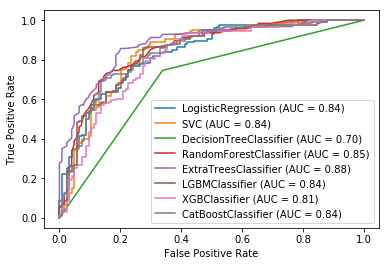

In [97]:
disp=plot_roc_curve(diabetes_LR,X_teste,y_teste)
plot_roc_curve(diabetes_SVM,X_teste,y_teste, ax=disp.ax_)
plot_roc_curve(decision_tree,X_teste,y_teste, ax=disp.ax_)
plot_roc_curve(random,X_teste,y_teste, ax=disp.ax_)
plot_roc_curve(extra,X_teste,y_teste, ax=disp.ax_)
plot_roc_curve(light,X_teste,y_teste, ax=disp.ax_)
plot_roc_curve(xgboost,X_teste,y_teste, ax=disp.ax_)
plot_roc_curve(catboost,X_teste,y_teste, ax=disp.ax_);

## Comparação entre os modelos

Vamos agora comparar os resultados dos modelos pelas principais métricas (Acurácia, precisão e *AUC*). 

Observando a tabela abaixo vemos que o melhor modelo foi o *Extra Tree Classifier*, que, em todas as métricas, obteve os melhores resultados.

|              ||  Acurácia   || Precisão classe 0|| Precisão classe 1||       *AUC*   ||
|:------------:||:-----------:||:---------------:||:-------------:||:-----------------:||
|*Logit*       ||   74.8%     ||     74%         ||    76%        ||       84%         ||
|SVM           ||   79.8%     ||     82%         ||    78%        ||       84%         ||
|Decision Tree ||   76.8%     ||     78%         ||    76%        ||       70%         ||
|Random Forest ||   82.7%     ||     84%         ||    81%        ||       85%         ||
|Extra Tree    ||   **84.9%** ||     **87%**     ||    **83%**    ||       **88%**     ||
|LightGBM      ||   80.9%     ||     82%         ||    80%        ||       84%         ||
|XGBoost       ||   79.7%     ||     81%         ||    79%        ||       81%         ||
|CatBoost      ||   80.5%     ||     84%         ||    78%        ||       84%         ||


## Conclusão

Sabemos como o diagnóstico médico é importante para o tratamento de doenças e preservação da vida de pacientes; quanto mais cedo um diagnóstico é dado, mais rápido o tratamento pode ser aplicado e vida podem ser salvas. Entretanto como falamos anteriormente (no início desse projeto) diagnósticos podem demorar e prejudicar a integridade das pessoas portadoras de doenças, principalmente falando de uma tão penosa como a diabetes.

O melhor modelo que encontramos (*Extra Tree Classifier*) teve uma acurácia de 85%, o que é um bom desempenho para um modelo que foi treinado com uma quantidade pequena de dados.

Acredito que o objetivo desse projeto foi alcançado que era utilizar modelos de *machine learning* para identificar quem é ou não portador de diabetes e falar um pouco de cada um desses modelos.